In [9]:
##### 08/22/2022 version to 04/02/2023 version-simplify, make it general and can call any of three networks
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline
#%run pure_strategy_selection.ipynb  #include simple selection algorithm
import scipy.io
import collections
import sys
from itertools import count

## Mathmatic Functions

In [10]:
# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m

# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean) 
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# def obj_polarization_1(A, L, op, n):  #z_mean is the same as s_mean - according to Stanford paper theory
#     z = np.dot(A, op) 
#     z_mean = mean_center(z, n)
#     return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]
# Parameters for the network
np.set_printoptions(precision=3)

## 1. Creating Network
### a. Import Network

In [5]:
%run Karate.ipynb
# %run Twitter.ipynb
# %run Reddit.ipynb

### b. Visualize Network


<class 'list'>


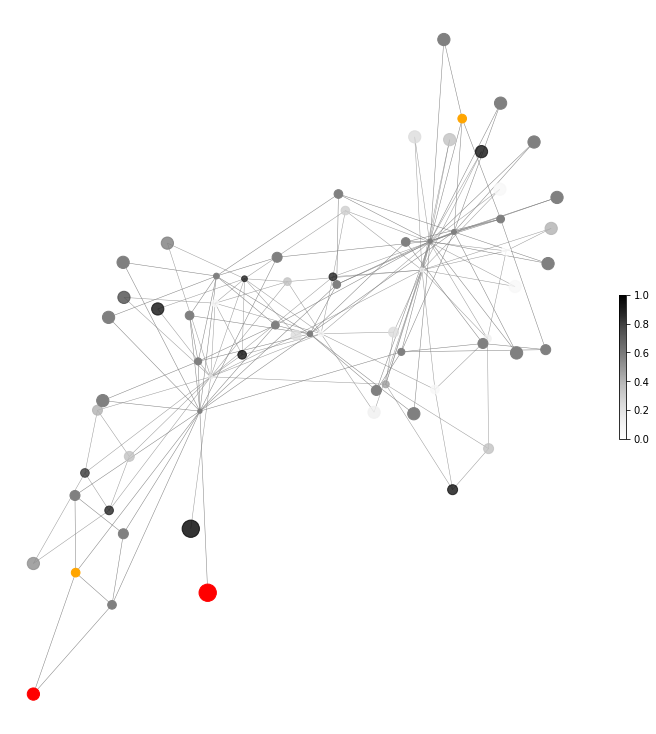

In [13]:
# what the twitter graph looks like 
s_use = s.flatten()   # Convert array to a list for later operation
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2

nxG = nx.from_numpy_matrix(G)   
# nxG = nx.relabel_nodes(nxG, mapping)      
plt.figure(figsize=(20, 20))


def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# print(node_edges)

node_sizes =[]
for i in node_edges:
    node_size = 1/i*2000
    node_sizes.append(node_size)

min_equi = [202,351,490]
max_equi = [199,529,37]
# Create node color
color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('orange')
    elif node in max_equi:
        color_map.append('red')
    else:
        color_map.append('grey')
# print(node_sizes)

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
#print(columnsum_ij)
print(n)
# what the twitter graph looks like 
nxG = nx.from_numpy_matrix(G)          
plt.figure(figsize=(20, 20))

# Fix seed - fix network shape
my_pos = nx.spring_layout(nxG, seed = 2)
nx.draw(nxG, pos= my_pos, with_labels= False, node_color=df['Opinion'].astype(int),cmap=plt.cm.Blues, node_size= node_sizes, edge_color='black', width=0.8, font_color='black',font_size=26, font_weight='bold', alpha=0.8)
#nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
cbar = plt.colorbar(sm, shrink = 0.5)
tick_font_size = 24
cbar.ax.tick_params(labelsize=tick_font_size)
plt.show()

# if we want to customize the color bar range to min/max s
# vmin = min(s)
# vmax = max(s)
# sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = vmin, vmax=vmax))
# sm._A = []
# plt.colorbar(sm,shrink=0.5)
# plt.show()

In [15]:
print("___________________Max Analyze__________________________________________")

nxG = nx.from_numpy_matrix(G) 
# G = nx.karate_club_graph()
print("_______________Degree Centrality_____________________________")  
plt.figure(figsize =(15, 15))
deg_centrality = nx.degree_centrality(nxG)
sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
converted_dict = dict(sortedDict)
print(converted_dict)
print("                           ")
print("_______________Closeness Rank_____________________________")
close_centrality = nx.closeness_centrality(nxG)
sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
converted_dict1 = dict(sortedDict1)
print(converted_dict1)
print("                           ")
print("_______________Page Rank_____________________________")
pr = nx.eigenvector_centrality(nxG)
sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
converted_dict3 = dict(sortedDict3)
print(converted_dict3)

print("                           ")

def gap(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return abs(x)

gap = gap(s,n)
my_gap = {index: value for index, value in enumerate(gap)}
sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
sorted_gap = dict(sorting_gap)
print(sorted_gap)



___________________Max Analyze__________________________________________
_______________Degree Centrality_____________________________
{11: 0.030303030303030304, 9: 0.06060606060606061, 12: 0.06060606060606061, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 26: 0.06060606060606061, 4: 0.09090909090909091, 10: 0.09090909090909091, 19: 0.09090909090909091, 24: 0.09090909090909091, 25: 0.09090909090909091, 28: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 27: 0.12121212121212122, 29: 0.12121212121212122, 30: 0.12121212121212122, 8: 0.15151515151515152, 13: 0.15151515151515152, 23: 0.15151515151515152, 3: 0.18181818181818182, 31: 0.18181818181818182, 1: 0.2727272727272727, 2: 0.30303030303030304, 32: 0.36363636363636365, 0: 0.48484848484848486, 33: 0.5151515151515151}
                         

<Figure size 1080x1080 with 0 Axes>

### c. Equilibrium & Polarization  - based on derivation
### $$P(z) = z ^T * z $$


In [16]:

## s =  make_innat_opinions(n, c1)
# print('Innate Opinion')
# print(s)
# print('Equilibrium Opinion')
# print(np.dot(A, s))

op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, s, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)

Innate_polarization:
1.1743186020487546
Equi_polarization:
0.15967526924290512
Difference:
-1.0146433328058495


### Testing players' behavior

In [17]:
def random_play(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
  
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
    new_op = random.randint(0, 1)  # randomly select an opininon between 0 and 1
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [18]:
def random_play1(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
#     max_opi_option = random.uniform(0, 1)   # options that maximizer have
    
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
#     v = 1
    new_op = random.uniform(0, 1)  # randomly select an opininon between 0 and 1
    #new_op = 0
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [19]:
## Testing to see if random_play works -- NO NEED TO RUN
# min_touched =[]
# (v1, maxmize_op, innat_equi_por, max_por) = choose_max_vertex(s, n, min_touched)
# print(v1, maxmize_op, innat_equi_por, max_por)

In [20]:
## Testing to see if random_play works -- NO NEED TO RUN
# (v1, max_opinion, max_pol) = random_play(s,n)
# (v2, min_opinion, min_pol) = random_play(s,n)

In [21]:
def maximizer_fir_play(s,n,min_touched):    # maxmizer first-time play, greedy algorithm
    op = copy.copy(s)

    print('Maximizer Play')

    max_champion = choose_max_vertex(op, n, min_touched) # The best choice among all opinions and vertexs, function is in "pure_strategy_selection.ipynb"
    (v1, max_opinion, innate_obj, max_pol) = max_champion # find agent v1, and max_opinion that can maxmize the equi_polarization(max_pol)

    if v1 == None:   # if maximizer cannot find one
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        ##### change the agent's opinion with best action(agent v1, max_op)
        op[v1,0] = max_opinion
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
        print("Network reaches equilibrium Polarization: " + str(max_pol))


    return(v1, max_opinion, max_pol)

In [22]:
# max_touched = []
# min_touched = []
# (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
# print(v1, max_opinion, max_pol)

In [23]:
##### minimizer first-time play, greedy algorithm
def minimizer_fir_play(s,n,max_touched): 
    
    op = copy.copy(s)
    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = choose_min_vertex(op, n, max_touched)
    (v2, min_opinion, innat_equi_por, min_pol) = min_champion
    
   #Store innate_op of the min_selected vertex
    old_opinion_min = op[v2,0]
    
    if v2 == None:
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")

        ##### change the agent's opinion
        op[v2,0] = min_opinion   #-------------------------------------------------> store minimize strategy


        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))

        print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
#         print(op)

    return (v2,min_opinion, min_pol)

In [24]:
# max_touched = []
# min_touched = []
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# print(v2, min_opinion, min_pol)

In [25]:
## Testing above functions
# min_touched=[]
# max_touched=[]
# # Game start from maximizer random play
# print('Maximizer random selection')
# (v1, max_opinion, max_pol) = random_play(s,n)
# max_touched.append(v1)
# # print('v1, max_opinion, max_pol')
# # print(v1, max_opinion, max_pol)
# # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history

# # Game start from minimizer random play 
# print('Minimizer random selection')
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# min_touched.append(v2)



In [26]:
# Row are Column are depended on min and max's choice: agent v and opinion 
def row_index(v2, min_opinion):
    row = 11*v2 + min_opinion*10 
    return int(row)
def column_index(v1,max_opinion):
    column = 2*v1 + max_opinion
    return int(column)  #the python dataframe index

### Mixed Strategy Payoff


In [27]:
def make_payoff_row(op1,v2):
    payoff_row = np.zeros(2*n)

#     print('one opinion changed -min')
#     print(op1)
    for column in range(2*n):
#         print(column)
        v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
        max_opinion = column%2
#         print(v1, max_opinion)
        # update the maximizer's change to the opinion array that has changed by minimizer(op1)
        op2 = copy.copy(op1)
#         temp = op1[v1]
        op2[v1,0] = max_opinion

        # calculate the polarization with both max and min's action
        payoff_row[column] = obj_polarization(A, L, op2, n)
#         op1[v1,0] = temp # restore
#         print(op2,payoff_row[column])

        ############# CAN DELETE 
#         if column==33:
# #         print('max_opinion')
# #         print(v1, max_opinion)
#             print('_________________________Payoff row start')
#             print('two opinion changed -min +  max')
#             print(op2)
        
    # when v1 == v2, the polarization should be negative for max, infinet for min. 
    # Replace the the column_index of agent v2 with 0 for max
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = -100
    payoff_row[j_2] = -100
    
    return payoff_row

In [28]:
op1 = copy.copy(s)
# print(op1)
op1[2,0] = 1  #op1 is the opinion array that updated by minimizer
# print(op1)
payoff_row_1 = make_payoff_row(op1,2)
print(payoff_row_1)


[   0.139    0.2      0.137    0.17  -100.    -100.       0.15     0.205
    0.149    0.229    0.132    0.195    0.132    0.191    0.142    0.176
    0.176    0.159    0.186    0.171    0.149    0.224    0.165    0.213
    0.163    0.2      0.157    0.178    0.228    0.164    0.21     0.154
    0.15     0.252    0.144    0.191    0.204    0.149    0.166    0.183
    0.191    0.139    0.158    0.211    0.194    0.14     0.182    0.121
    0.223    0.16     0.195    0.162    0.229    0.144    0.174    0.147
    0.179    0.161    0.181    0.115    0.174    0.16     0.179    0.151
    0.19     0.131    0.175    0.121]


### Minimizer Mixed Strategy

In [46]:
#NEEDDDDDDD UPDAE

# Calculate polarization of minimizer's Mixed Strategy
def mixed_min_polarization(s,v2,weight_op,fla_max_fre):

    op1 =  copy.copy(s) # make a copy of the innate opinion array 
    op1[v2,0] = weight_op # then only updated by minimizer's current change
#     print('Min update')
#     print(v2, weight_op)
    # calculate the polarization with both min(did here) and max's action(in make_payoff_row)
    payoff_row = make_payoff_row(op1,v2)  # the vector list out 2*n payoffs after min's action combine with 2*n possible max's actions
    #print(payoff_row)

    # Replace the the column_index of agent v2 with 100 for min
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = 100
    payoff_row[j_2] = 100
    
#     print('Min Payoff Row')
#     print(payoff_row)
    #calculate fictitious payoff - equi_min  
    payoff_cal = payoff_row * fla_max_fre # fla_max_fre recorded the frequency of each maximizer's action, frequency sum = 1
                                             # payoff (2*n array) * maximizer_action_frequency (2*n array)
# can DELETE - use to check if function works as expected
#     if v2 ==6 and v1==16:
#         print('Payoff row')
#         column = column_index(16,1)
#         print(payoff_row[column],column)
#         print('fla_max_fre')
#         print(np.nonzero(fla_max_fre))
#         print(fla_max_fre [np.nonzero(fla_max_fre)])
#         print('compare to: '+str(fla_max_fre[column]))
    
    mixed_pol = np.sum(payoff_cal) # add up all, calculate average/expected payoff


#     print('min_mixed_polarization')
#     print(mixed_pol)
        # Replace the the column_index of agent v2 with 100 for min

    payoff_row[j_1] = -100
    payoff_row[j_2] = -100

    return (mixed_pol,payoff_row)


In [47]:
# # op2=op
# # op2[0,0]=1
# # min_opinion1 = derivate_s(op2,n,1)
# # # print(min_opinion1)
# # min_opinion2 = derivate_s1(op2,n,1)
# # print(min_opinion2)
# v2 = 254
# min_opinion = 0
# (mixed_pol, payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
# print(np.nonzero(fla_max_fre))

In [48]:
def derivate_s(op,n,v2):
               #op - opinion array that updated by maximizer
    c = [1/n] * n
#     print(c)
    sum_term = 0
    j = 0

    sum_term = np.dot(np.dot((A-c),(A[v2]-c)),op)  # sum up all terms
    
    term_out = op[v2]*np.dot((A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
    sum_s = sum_term - term_out    # numerator
    
    s_star = -sum_s/np.dot((A[v2]-c),(A[v2]-c))
    s_star = s_star[0] #take value out of array
    min_opinion =min(max(0,s_star),1)
    
#     print('Min opinion-should be unique')
#     print(min_opinion)
    return min_opinion

# def derivate_s1(op,n,v2):
#                #op - opinion array that updated by maximizer
#     c = [1/n] * n
# #     print(c)
#     sum_term = 0
#     j = 0
#     for j in range(0,n):
#         term = op[j]*np.dot(np.transpose(A[j]-c),(A[v2]-c))
# #             print(A[j])
# #             print(A[v])
#         sum_term = sum_term + term  # sum up all terms
    
#     term_out = op[v2]*np.dot(np.transpose(A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
#     sum_s = sum_term - term_out    # numerator
    
#     s_star = -sum_s/np.dot(np.transpose(A[v2]-c),(A[v2]-c))
#     s_star = s_star[0] #take value out of array
#     min_opinion =min(max(0,s_star),1)
            
#     return min_opinion

## Print out weighted opinion proved that we need to do this step insetead of min_mixed_opinion - we are weighting
# different min_opinion here
def min_mixed_opinion_1(s, n, v2, fla_max_fre):
    
    weight_op = 0
    
    # loop for each max_action(in total 2*n) 
    for column in range(2*n):

        if fla_max_fre[column] !=0:
            v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
            max_opinion = column%2
            op = copy.copy(s)
            op[v1] = max_opinion
#             print(op)

#             print('Weight')
#             print(fla_max_fre[column])
            min_opinion = derivate_s(op, n, v2)# find min_s_star for each max_action


            
            op1 = copy.copy(op)
            op1[v2] = min_opinion   #after max action, update min action on opinion array
#             print(min_opinion)
            min_por = obj_polarization(A, L, op1, n)
            t = 0  
            weight_op = weight_op + fla_max_fre[column]*min_opinion # sum up p_i*s_i

  
    (mixed_por, payoff_row) = mixed_min_polarization(s, v2, weight_op,fla_max_fre)
    print('Weighted polarization')
    print(mixed_por)

    return(weight_op,payoff_row,mixed_por)  

In [3]:
# op=copy.copy(s)
# op[21] = 1
# print(op)
# # print(21,fla_max_fre)
# v2 = 6
# (weight_op_1,payoff_row,min_por) = min_mixed_opinion_1(s, n, v2, fla_max_fre)


In [50]:
# a = obj_polarization(A, L, s, n) #min_por- set a standard to compare with pol after min's action
# # maxup_por = min_por # store innate max updated polarization
# print(a)
# print(s[253])
# op = copy.copy(s)
# op[253] = 0
# b = obj_polarization(A, L, op, n)
# print(b)


In [51]:
# Minimizer search: Go through each agent 

def mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre):
    # current polarization that changed by maximizer, "innate" objective that min start with
    op = copy.copy(s)
    op[v1,0] = max_opinion
#     print('Check if op has been updated by Maximizer')
#     print(op)
    min_por = obj_polarization(A, L, op, n) #min_por- set a standard to compare with pol after min's action
    maxup_por = min_por # store innate max updated polarization
#     print('check maxup por')
#     print(maxup_por)
#     payoffs = []    # create an empty list to store all polarizations   
    champion = (None, None, 0, None)  # assume the best action is champion

    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x not in max_touched]  # for the vertice that Maximizer has not touched
    
    for v2 in C1:   
        print('_________________________________')
        print('Min start with agent '+ str(v2) )
        (changed_opinion, payoff_row, por) =  min_mixed_opinion_1(s, n, v2, fla_max_fre) # find the best new_op option           
#         print('changed opinion, por, Maxup_por')
#         print(changed_opinion, por, maxup_por)

        if por < min_por:  # if the recent polarization is smaller than the minimum polarization in the history
            min_por = por
                                 # update the recent option as champion
            champion = (v2, changed_opinion, payoff_row, min_por)  
#         else:
#             print('Innate polarization is smaller than Min action')

    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [2]:
# v1 = 16
# max_opinion = 1
# champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
# print(champion)

In [53]:
####Op has been updated by maximizer, fla_max_fre includes max's hisotry, so minimizer react to the innate op after that
def mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre): 

    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
    (v2, min_opinion, payoff_row, min_pol) = min_champion
    
    if v2 == None:    # if minimizer cannot find a action to minimize polarization after maximizer's action
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")
#         print('v2', 'changed_opinion', 'innate_obj', 'obj')
#         print(v2, min_opinion, innat_equi_por, min_pol)

        # Store innate_op of the min_selected vertex
        old_opinion_min = op[v2,0]

        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
        print('fla_max_fre')
        print(np.nonzero(fla_max_fre))
        print(fla_max_fre [np.nonzero(fla_max_fre)])


#         print("Payoff row")
#         print(payoff_row)
#         print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
    return (v2, payoff_row, min_opinion, min_pol)                 

In [1]:
# print(max_touched)
# (v2, payoff_row, min_opinion, polarization) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
# print('v2, payoff_row, min_opinion, polarization')
# print(v2, payoff_row, min_opinion, polarization)

### Maximizer Mixed Strategy

In [55]:
####Op has been updated by minimizer, fla_min_fre includes min's hisotry, so maxmizer react to the innate op after that
def mixed_max_polarization(payoff_matrix,v1,max_opinion,fla_min_fre):

    # create payoff matrix for maxmizer
    column = int(column_index(v1,max_opinion))
#     print(payoff_matrix)
#     print("column"+str(column))
    payoff_vector = payoff_matrix[:,column]
    
#     print('payoff vector')
#     print(payoff_vector)

    #calculate fictitious payoff - equi_max   
    payoff_cal = payoff_vector * fla_min_fre #payoff * frequency
    
#     print('max_payoff_calculation')
#     print(payoff_cal)
    mixed_pol = np.sum(payoff_cal) # add up
#     print("Max_mixed_polarization")
#     print(mixed_pol)

    return mixed_pol


In [56]:
# mixed_pol = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)

In [57]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre):
    
    por_arr = np.zeros(2)  # create a two_element array to store polarization value of each option


    max_opi_option = [0, 1.0]   # Maximizer has two options to change agent v1's opinion
    
    # objective if set opinion to 0, 1.0
    j = 0
    for new_op in max_opi_option:
#         print('change op to '+ str(i/10))
        max_opinion = new_op

        por_arr[j] = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)
    
        j = j + 1   # index increase 1, put the polarization in array

#     print('Polarization Options')
#     print(por_arr)
    
    maxmize_op = np.argmax(por_arr)  # the index of maximum polarization = max_opinion --[0,1]
    max_por = np.max(por_arr)        # find the maximum polarization in the record
 
#     print('new_op', 'innat_equi_por', 'max_por')
#     print(maxmize_op, innat_equi_por, max_por)

    return (maxmize_op, max_por)

In [58]:
# fla_min_fre = [0, 0, 0, 0, 0.65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.35, 0, 0, 0]
# v1 = 2
# champion = max_mixed_opinion(payoff_matrix, n, v1, v2, fla_min_fre)
# print(champion)

In [59]:
# determine which agent maximizer should select to maximizer the equilibrium polarization
def mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre):
#     print('Check if op has been updated by minimizer')
#     print(op)
    max_por = obj_polarization(A, L, op, n)  # use "innate"(after min action) polarization as a comparable standard to find max_por
    minup_por = max_por # store innate min_update polarization
#     print('check minup por')
#     print(minup_por)
    champion = (None, None, max_por)  # assume champion is the best action

    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x not in min_touched]  # for the vertice that Minimizer has not touched
    for v1 in C1:  
#             print('Maximizer start from agent'+str(v1))
            (changed_opinion, por) = max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre)
#             print('changed_opinion, por, minup_por')
#             print(changed_opinion, por,minup_por)
            
            if por > max_por: # if the polarization of most recent action > maximum polarization of previous actions
                max_por = por
                champion = (v1, changed_opinion,max_por)   # save the this action as champion    
#             else:
#                 print('Innate polarization is bigger than max action')
 
    return (champion)


In [60]:
print(payoff_matrix)
champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)

NameError: name 'payoff_matrix' is not defined

In [61]:
# # min_touched = []
# # payoff_matrix = np.empty((0, 2*n), float)
# # fla_min_fre = np.empty((0,n))
# # champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)
# # print(champion)
# print(c1)
# vertices = np.where(c1)
# print(vertices)
# por=0
# for i in c1:
#     print(i)
#     max_por = 0.75
#     if por > max_por:
#         max_por = por
#         print('yes')
#     else:
#         print('por<max')

In [62]:
def mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre): 
    op = copy.copy(s)   # op is a copy of innate opinion
    
    #update innat opinion 
    op[v2,0] = min_opinion  # Op has been updated by minimizer, so maximizer react to the innate op after that
    

    max_champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre) # The best choice among all opinions and vertexs
    (v1, max_opinion, max_pol) = max_champion

    if v1 == None:
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
#         print("Network reaches equilibrium Polarization: " + str(max_pol))
#         print('2 opinion changed')
#         print(op)

    return(v1, max_opinion, max_pol)

In [63]:
# # # Testing function -- NO NEED TO RUN
# min_touched = []
# v2 = 0
# min_opinion = 0
# b = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
# print('v1,max_opinion,max_pol')
# print(b)

### Testing Player's Behavior

# 5. Innate Op and Game

# Fictitious Play Start !


In [64]:
op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, op, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)



Innate_polarization:
1.1743186020487546
Equi_polarization:
0.15967526924290512
Difference:
-1.0146433328058495


In [65]:
Network = 'Karate'
memory = 50


# with open('Network_'+str(Network)+'.txt', "a") as fi:
#     print('Innate Opinion', file=fi)
#     print(s, file=fi)
#     print('Adjacency Matrix', file=fi)
#     print(G,file=fi)

# Game Preparation
def push(obj, element):
    if len(obj) >= memory:
        obj.pop(0)
        print('pop')
    obj.append(element)
    return obj


In [77]:
# Game Parameters
Game_rounds =501 # Rounds + 1- use for printing data
memory = 1
def all_fre_limited_touch(s, n):
    # Preparation for the game
    op = copy.copy(s)
    payoff_matrix = np.empty((0, 2*n), float)
    max_history = np.zeros([n, 2])  # n*2 matrix, agent i & opinion options
    min_history = []  # append a list of (agent i, min_opinion), min_opinion can be any value
#     print(type(min_history))

    max_history_last_100 = np.zeros([n, 2]) 
    min_history_last_100= []

    max_touched = []
    min_touched = []
    min_touched_all = []
    min_touched_last_100 =[]
    print('min_touched')
    print(min_touched)
    
    
    # Game start from maximizer random play
    print('Maximizer first selection')
    (v1, max_opinion, max_pol) = random_play(op,n)   # Maximizer does random action 
    #(v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
    #(v1, max_opinion, max_pol) = (11, 1, 0.14833274000237331)
    First_max = (v1, max_opinion, max_pol) 


#     (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,max_touched)

    # Maximizer start with greedy play
    # (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)   # Maximizer choose action greedily
    max_touched.append(v1)    # save Maximizer's action history

    # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history
    max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1
    # print('max_history')
    # print(max_history)
    print('history at spot')
    print(max_history[v1,int(max_opinion)])

    max_frequency = max_history/1  # its frequency, only played  1 time so far, divided by 1 
    # print('fre_max at spot')
    # print(max_frequency[v1,int(max_opinion)])

    fla_max_fre = max_frequency.flatten()   # flatten the n*2 matrix to a 2n*1 matrix
                                            # so we can multiply the freuency (2n*1)with payoff array (1*2n) 
                                            # to get average payoff of fictitious play
    print('fre_max at spot')
    print(fla_max_fre)

    column = int(column_index(v1,max_opinion))    # the frequency of maximizer's most recent action (v1,max_opinion)

    print(fla_max_fre[column])

    # print(np.shape(fla_max_fre.shape))


    # if game start from minimizer random play - make sure two random play are not same agent!!!
    print('Minimizer first selection')
    (v2, min_opinion, min_pol) = random_play(op,n) 
    #(v2, min_opinion, min_pol) = minimizer_fir_play(s,n,min_touched)
    
    #(v2, min_opinion, min_pol) = (29, 1, 0.5933309600094931)
    First_min = (v2, min_opinion, min_pol)

    if v1==v2:   # if Max and Min randomly selected the same agent, then we need to restart - cannot choose same agent
        sys.exit()

    # Minimizer start with greedy play
    # (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)

    min_touched.append(v2)
   

    # store minimizer play history
    min_history.append((v2,min_opinion))
    print('min_history')
    print(min_history)


    counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter)
    fla_min_fre = np.array(list(counter.values()))/1 #return only frequency of all min options in order
#     print('fla_min_fre')
#     print(fla_min_fre)


    (a,payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
    payoff_matrix = np.vstack([payoff_matrix, payoff_row])
#     print('Payoff Matrix')
#     print(payoff_matrix)
    print('fla_min_fre at the spot')
    min_counter = dict(counter)
    print(min_counter) 
    print(min_counter[(v2,min_opinion)]) 
#     print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)


    equi_min = min_pol
    equi_max = max_pol
    # print(equi_min)
    # print(equi_max)



    Flag = 0

    i = 0
    while Flag == 0: 
        i = i + 1
        print("Game " + str(i))
        print("_____________________")

    #     if max_pol == min_pol:
        if i == Game_rounds:            # i == # of iterations you want to run + 2
                                # because Game 101 is skipped for collecting data, to get 200 game result, we need to run 201 iteration
            print('min_recent_'+str(memory)+'_touched')# then stop at Game 202
            print(min_touched)
            print('max_recent_'+str(memory)+'_touched')
            print(max_touched)
            print('Min last 100 action')
            print(min_touched_last_100)

            break

        elif equi_min == equi_max:
            print("Reached Nash Equilibrium at game"+ str(i) + "and Equi_Por = " + str(equi_min))
            print('max_distribution')
            print(max_frequency)
            print('min_distribution')
            print(fla_min_fre)
            Flag = 1
            break
        ############################## maximizer play  
        else:
            if i == Game_rounds-100:    #if Game_round = 200, after 100 iteration, Game 101 print previous historical result
    #             max_touched_100 = max_touched 
    #             min_touched_100 = min_touched
    #             max_fre_100 = max_frequency  # store the max_frequency of first 100 iterataions
    #             print('max_history')
    #             print(max_history)
    #             min_fre_100 = fla_min_fre  # max_frequency of first 100 iterations
    #             print('min_history')
    #             print(min_history)
    # Remove max frequncy less than 0.1--
                max_history_last_100 = np.zeros([n, 2]) 
                min_history_last_100 = [] 
                min_touched_last_100 =[]

            (v1, max_opinion, equi_max) = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
            max_touched = push(max_touched, v1)
    #         print('min_touched')
    #         print(min_touched)
    #         print('max_touched')
    #         print(max_touched)
    #             print('equi_max')
    #             print(equi_max)
    #         print(v1, max_opinion, max_pol)
            # cumulate strategy 
            max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1

            max_history_last_100[v1,int(max_opinion)] = max_history_last_100[v1,int(max_opinion)] +1
    #         print('max_history')
    #         print(max_history)
    #________________________________________________________________
            max_frequency = max_history/(i+1)  # its frequency 
    #         print('max_distribution')
    #         print(max_frequency)
        #     print(i+1) 
            fla_max_fre = max_frequency.flatten() #flaten max_frequency to calculate average payoff
#             print('fla_max_fre')
#             print(fla_max_fre)
            print('fre_max at spot')
            print(fla_max_fre[column])
            # create payoff matrix for maxmizer
            row = int(row_index(v2, min_opinion))
            column = int(column_index(v1,max_opinion))

    # _________________________________________________________________
    #         ######################Visualize Maximizer's selection
    #         La = scipy.sparse.csgraph.laplacian(G, normed=False)

    #         nxG = nx.from_numpy_matrix(G)

    #         color_map = []
    #         for node in nxG:
    #             if node == v1:
    #                 color_map.append('Red')
    #             else: 
    #                 color_map.append('Grey')  

    #         #nxG1 = nx.DiGraph(G)
    #         nx.draw(nxG, node_color=color_map, with_labels=True,node_size = 50)
    #         plt.figure(figsize=(200, 200))
    #         plt.show()



    ############################### minimizer play
            (v2, payoff_row, min_opinion, equi_min) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
            min_touched = push(min_touched, v2)
            min_touched_all.append(v2) 
            min_touched_last_100.append(v2)
    #         print('min_touched')
    #         print(min_touched)
    #         print('equi_min')
    #         print(equi_min)
    #         print('max_touched')
    #         print(max_touched)
            #         print(v2, min_opinion, min_pol)
            if (v2,min_opinion) in counter.keys():
                payoff_matrix = payoff_matrix # if this min_option is in min_history, no need to update paryoff matrix, only update frequency
                print("Same history")
                print((str(v2),str(min_opinion)))
            else:
                payoff_matrix = np.vstack([payoff_matrix, payoff_row]) # if this is a new option, append to previous matrix
    #                 print('payoff_row')
    #                 print(payoff_row)
            min_history.append((v2,min_opinion))
            min_history_last_100.append((v2,min_opinion))
            #         print('min_history')
            #         print(min_history)
            counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
            #print(counter)
    #         print('counter.keys')
    #         print(counter.keys())
            fla_min_fre = np.array(list(counter.values()))/(i+1) #return only frequency of all min options in order
    #         print('fla_min_fre')
    #         print(fla_min_fre)

    #         print('fla_min_fre at the spot')
    #         min_counter = dict(counter)
    #         print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)

            # create payoff matrix for minimizer
            row = row_index(v2, min_opinion)
            column = column_index(v1,max_opinion)
            #     print('row, column')
            #     print(row, column)

            print("Not Reached Nash Equilibrium at Equi_Min = " + str(equi_min) + " and Equi_Max = "+ str(equi_max)) 
    #         print('min_distribution')
    #         print(fla_min_fre)

            ######################Visualize Minimizer selection
    #         La = scipy.sparse.csgraph.laplacian(G1, normed=False)

    #         nxG = nx.from_numpy_matrix(G1)

    #         color_map = []
    #         for node in nxG:
    #             if node == v2:
    #                 color_map.append('Blue')
    #             else: 
    #                 color_map.append('Grey')  

    #         #nxG1 = nx.DiGraph(G)
    #         nx.draw(nxG, node_color=color_map, with_labels=True)
    #         plt.figure(figsize=(25, 25))
    #         plt.show()
    return (First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100)



In [82]:
Experiment = 1

Experiment_note = str('Note: This experiement has initial condition. Game round:'+str(Game_rounds)+'.')
(First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100) = all_fre_limited_touch(s, n)


min_touched
[]
Maximizer first selection
    Agent6 's opinion 0.720404905537744 changed to 1
Network reaches equilibrium Polarization: 0.19725669951013458
history at spot
1.0
fre_max at spot
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
Minimizer first selection
    Agent26 's opinion 0.4449042104919422 changed to 0
Network reaches equilibrium Polarization: 0.22756976926150996
min_history
[(26, 0)]
Counter({(26, 0): 1})
fla_min_fre at the spot
{(26, 0): 1}
1
Game 1
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.5
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21139861628505582
_________________________________
Min start with agent 1


Weighted polarization
0.16770239715998417
_________________________________
Min start with agent 6
Weighted polarization
25.131879697133364
_________________________________
Min start with agent 7
Weighted polarization
0.2400457559866887
_________________________________
Min start with agent 8
Weighted polarization
0.2436313112194717
_________________________________
Min start with agent 9
Weighted polarization
0.2268399736967044
_________________________________
Min start with agent 10
Weighted polarization
0.22046698473693052
_________________________________
Min start with agent 11
Weighted polarization
0.21094004976454417
_________________________________
Min start with agent 12
Weighted polarization
0.2385530259026866
_________________________________
Min start with agent 13
Weighted polarization
0.24686941451639266
_________________________________
Min start with agent 14
Weighted polarization
0.2467468466123679
_________________________________
Min start with agent 15
Weighted p

_________________________________
Min start with agent 17
Weighted polarization
0.23005246584844508
_________________________________
Min start with agent 18
Weighted polarization
0.2298882078966066
_________________________________
Min start with agent 19
Weighted polarization
0.25219968091317063
_________________________________
Min start with agent 20
Weighted polarization
0.21762464135779938
_________________________________
Min start with agent 21
Weighted polarization
0.24478591357710086
_________________________________
Min start with agent 22
Weighted polarization
0.21979659019931755
_________________________________
Min start with agent 23
Weighted polarization
0.20521529998956345
_________________________________
Min start with agent 24
Weighted polarization
0.250435417345234
_________________________________
Min start with agent 25
Weighted polarization
0.2435849243311151
_________________________________
Min start with agent 26
Weighted polarization
0.2300617846629239
_____

Weighted polarization
0.247762933636761
_________________________________
Min start with agent 9
Weighted polarization
0.23096090877492997
_________________________________
Min start with agent 10
Weighted polarization
0.22546204146247112
_________________________________
Min start with agent 12
Weighted polarization
0.2426755984433223
_________________________________
Min start with agent 13
Weighted polarization
0.250996068950638
_________________________________
Min start with agent 14
Weighted polarization
0.2508720362657138
_________________________________
Min start with agent 15
Weighted polarization
0.23509111635769253
_________________________________
Min start with agent 16
Weighted polarization
77.8175063300391
_________________________________
Min start with agent 17
Weighted polarization
0.2284535841187689
_________________________________
Min start with agent 18
Weighted polarization
0.2288393694341928
_________________________________
Min start with agent 19
Weighted pol

                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.3333333333333333
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.22368866678314386
_________________________________
Min start with agent 1
Weighted polarization
0.23322037681990251
_________________________________
Min start with agent 2
Weighted polarization
0.23402372266640634
_________________________________
Min start with agent 3
Weighted polarization
0.2399543321425976
_________________________________
Min start with agent 4
Weighted polarization
0.22150439223012217
_________________________________
Min start with agent 5
Weighted polarization
0.1769742890531119
_________________________________
Min start with agent 6
Weighted polarization
8.49768206977669
_________________________________
Min start with agent 7
Weighted polarization
0.23527793117359547
_____________

Weighted polarization
0.22471746347513627
_________________________________
Min start with agent 29
Weighted polarization
0.18993969756586798
_________________________________
Min start with agent 30
Weighted polarization
0.23155410320745715
_________________________________
Min start with agent 31
Weighted polarization
0.22889978533809438
_________________________________
Min start with agent 32
Weighted polarization
0.2069290216328274
_________________________________
Min start with agent 33
Weighted polarization
0.19390134581233442
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.031870737891690364
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.071 0.429 0.5  ]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1781968267849413 and Equi_Max = 0.19220047295785234
Game 14
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 

Weighted polarization
0.22495735759916485
_________________________________
Min start with agent 2
Weighted polarization
0.2277828094255361
_________________________________
Min start with agent 3
Weighted polarization
0.23225791908844134
_________________________________
Min start with agent 4
Weighted polarization
0.21671720568854802
_________________________________
Min start with agent 5
Weighted polarization
0.1793956028698236
_________________________________
Min start with agent 6
Weighted polarization
6.052747122109287
_________________________________
Min start with agent 7
Weighted polarization
0.22741789878466434
_________________________________
Min start with agent 8
Weighted polarization
0.2330351299424004
_________________________________
Min start with agent 9
Weighted polarization
0.2169996910081014
_________________________________
Min start with agent 10
Weighted polarization
0.21565693014563297
_________________________________
Min start with agent 12
Weighted polar

Weighted polarization
0.22558554906749922
_________________________________
Min start with agent 26
Weighted polarization
0.2128510949040816
_________________________________
Min start with agent 27
Weighted polarization
0.20966716685570694
_________________________________
Min start with agent 28
Weighted polarization
0.21904330153223406
_________________________________
Min start with agent 29
Weighted polarization
0.18504746264582916
_________________________________
Min start with agent 30
Weighted polarization
0.22576293206648684
_________________________________
Min start with agent 31
Weighted polarization
0.22325781232663808
_________________________________
Min start with agent 32
Weighted polarization
0.2014194431434407
_________________________________
Min start with agent 33
Weighted polarization
0.18872376496523388
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.04461903304836651
fla_max_fre
(array([1

Weighted polarization
0.22337610243846595
_________________________________
Min start with agent 3
Weighted polarization
0.22686743097014106
_________________________________
Min start with agent 4
Weighted polarization
0.21331035315264546
_________________________________
Min start with agent 5
Weighted polarization
0.1808691397616147
_________________________________
Min start with agent 6
Weighted polarization
4.341056177682226
_________________________________
Min start with agent 7
Weighted polarization
0.22190683597327102
_________________________________
Min start with agent 8
Weighted polarization
0.22816856449707046
_________________________________
Min start with agent 9
Weighted polarization
0.21240108184380307
_________________________________
Min start with agent 10
Weighted polarization
0.2123113231914699
_________________________________
Min start with agent 12
Weighted polarization
0.22094131914209214
_________________________________
Min start with agent 13
Weighted po

Weighted polarization
0.2171311364196717
_________________________________
Min start with agent 2
Weighted polarization
0.22183991992861238
_________________________________
Min start with agent 3
Weighted polarization
0.22499668455969346
_________________________________
Min start with agent 4
Weighted polarization
0.2121176426543328
_________________________________
Min start with agent 5
Weighted polarization
0.18133776841073798
_________________________________
Min start with agent 6
Weighted polarization
3.747158974608185
_________________________________
Min start with agent 7
Weighted polarization
0.2199930950877342
_________________________________
Min start with agent 8
Weighted polarization
0.22647623831521707
_________________________________
Min start with agent 9
Weighted polarization
0.21080361583768076
_________________________________
Min start with agent 10
Weighted polarization
0.21113578937876698
_________________________________
Min start with agent 12
Weighted pola

Weighted polarization
0.2027848706863471
_________________________________
Min start with agent 18
Weighted polarization
0.20782860807259768
_________________________________
Min start with agent 19
Weighted polarization
0.22707130169402723
_________________________________
Min start with agent 20
Weighted polarization
0.19640991546611308
_________________________________
Min start with agent 21
Weighted polarization
0.21825752779932373
_________________________________
Min start with agent 22
Weighted polarization
0.198444587312517
_________________________________
Min start with agent 23
Weighted polarization
0.1856238328195007
_________________________________
Min start with agent 24
Weighted polarization
0.22600580829377837
_________________________________
Min start with agent 25
Weighted polarization
0.22039007929781104
_________________________________
Min start with agent 26
Weighted polarization
0.2078729650350172
_________________________________
Min start with agent 27
Weigh

Weighted polarization
0.22870804726895055
_________________________________
Min start with agent 25
Weighted polarization
0.22298029113790063
_________________________________
Min start with agent 26
Weighted polarization
0.21036870039681382
_________________________________
Min start with agent 27
Weighted polarization
0.20739282315455282
_________________________________
Min start with agent 28
Weighted polarization
0.21655938622573728
_________________________________
Min start with agent 29
Weighted polarization
0.18295925461111706
_________________________________
Min start with agent 30
Weighted polarization
0.22321798790989622
_________________________________
Min start with agent 31
Weighted polarization
0.2207943435960405
_________________________________
Min start with agent 32
Weighted polarization
0.19902499727661485
_________________________________
Min start with agent 33
Weighted polarization
0.18649416335123883
                                
Minimizer finds its target

Weighted polarization
0.2303207936052497
_________________________________
Min start with agent 9
Weighted polarization
0.21446784733566482
_________________________________
Min start with agent 10
Weighted polarization
0.21410711456530973
_________________________________
Min start with agent 11
Weighted polarization
64.18265859848772
_________________________________
Min start with agent 12
Weighted polarization
0.2232488210768012
_________________________________
Min start with agent 13
Weighted polarization
0.2325365440201283
_________________________________
Min start with agent 14
Weighted polarization
0.23246015006593193
_________________________________
Min start with agent 15
Weighted polarization
0.21849875879257347
_________________________________
Min start with agent 17
Weighted polarization
0.2084883729466672
_________________________________
Min start with agent 18
Weighted polarization
0.21262559467368922
_________________________________
Min start with agent 19
Weighte

Weighted polarization
0.18988751426317163
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.04534454578086027
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.024 0.61  0.366]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18117062955271543 and Equi_Max = 0.18574757478962758
Game 41
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.38095238095238093
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.2156332134591721
_________________________________
Min start with agent 1
Weighted polarization
0.22406473897031115
_________________________________
Min start with agent 2
Weighted polarization
0.22732348485520973
_________________________________
Min start with agent 3
Weighted polarization
0.23149184919954588
_______________________

Weighted polarization
0.2348804703493218
_________________________________
Min start with agent 20
Weighted polarization
0.20321199930859174
_________________________________
Min start with agent 21
Weighted polarization
0.22641582770064483
_________________________________
Min start with agent 22
Weighted polarization
0.2052822474082036
_________________________________
Min start with agent 23
Weighted polarization
0.19197932291594882
_________________________________
Min start with agent 24
Weighted polarization
0.23364454809037666
_________________________________
Min start with agent 25
Weighted polarization
0.22770996923040138
_________________________________
Min start with agent 26
Weighted polarization
0.21492561457141068
_________________________________
Min start with agent 27
Weighted polarization
0.21165617964072053
_________________________________
Min start with agent 28
Weighted polarization
0.22111845208236403
_________________________________
Min start with agent 29
We

0.6170212765957447
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.214803348610167
_________________________________
Min start with agent 1
Weighted polarization
0.22313006114537587
_________________________________
Min start with agent 2
Weighted polarization
0.2266128898727061
_________________________________
Min start with agent 3
Weighted polarization
0.23062349969548596
_________________________________
Min start with agent 4
Weighted polarization
0.21624118981211787
_________________________________
Min start with agent 5
Weighted polarization
0.18132871970459383
_________________________________
Min start with agent 6
Weighted polarization
2.3053135838715884
_________________________________
Min start with agent 7
Weighted polarization
0.22572726259721582
_________________________________
Min start with agent 8
Weighted polarization
0.231647617076914
_________________________________
Min start with agent 9


Weighted polarization
0.21469280763729437
_________________________________
Min start with agent 12
Weighted polarization
0.22400224083159154
_________________________________
Min start with agent 13
Weighted polarization
0.2332659596212825
_________________________________
Min start with agent 14
Weighted polarization
0.23318752878694515
_________________________________
Min start with agent 15
Weighted polarization
0.21917636435910026
_________________________________
Min start with agent 16
Weighted polarization
34.821931020170226
_________________________________
Min start with agent 17
Weighted polarization
0.20925636718056428
_________________________________
Min start with agent 18
Weighted polarization
0.21329284411827254
_________________________________
Min start with agent 19
Weighted polarization
0.23313390535966053
_________________________________
Min start with agent 20
Weighted polarization
0.20170778833578373
_________________________________
Min start with agent 21
We

Weighted polarization
0.2128209599257652
_________________________________
Min start with agent 27
Weighted polarization
0.2096988202755607
_________________________________
Min start with agent 28
Weighted polarization
0.21901318931417052
_________________________________
Min start with agent 29
Weighted polarization
0.1851328515347379
_________________________________
Min start with agent 30
Weighted polarization
0.2257151035835187
_________________________________
Min start with agent 31
Weighted polarization
0.22323543448655256
_________________________________
Min start with agent 32
Weighted polarization
0.20141506574769005
_________________________________
Min start with agent 33
Weighted polarization
0.1887680256932851
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.048118565052159966
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.02  0.647 0.333]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.181567

Weighted polarization
0.20048135907378212
_________________________________
Min start with agent 21
Weighted polarization
0.22309203334061295
_________________________________
Min start with agent 22
Weighted polarization
0.20253609922789317
_________________________________
Min start with agent 23
Weighted polarization
0.1894411348890711
_________________________________
Min start with agent 24
Weighted polarization
0.2305495078680646
_________________________________
Min start with agent 25
Weighted polarization
0.2247540219422385
_________________________________
Min start with agent 26
Weighted polarization
0.21208558536545102
_________________________________
Min start with agent 27
Weighted polarization
0.2090144317290494
_________________________________
Min start with agent 28
Weighted polarization
0.21827741857844152
_________________________________
Min start with agent 29
Weighted polarization
0.18449392910683055
_________________________________
Min start with agent 30
Weig

Weighted polarization
0.20026762773464082
_________________________________
Min start with agent 33
Weighted polarization
0.18768541116608695
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05046200166184308
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.018 0.679 0.304]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18180844254835948 and Equi_Max = 0.18501742158600815
Game 56
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.6842105263157895
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.2119738817270509
_________________________________
Min start with agent 1
Weighted polarization
0.2199558552461957
_________________________________
Min start with agent 2
Weighted polarization
0.22416425498090292
________________________

Weighted polarization
0.181929363342797
_________________________________
Min start with agent 6
Weighted polarization
1.8738566981562759
_________________________________
Min start with agent 7
Weighted polarization
0.22222703465565208
_________________________________
Min start with agent 8
Weighted polarization
0.22853382673108907
_________________________________
Min start with agent 9
Weighted polarization
0.212783796961324
_________________________________
Min start with agent 10
Weighted polarization
0.21290055427526144
_________________________________
Min start with agent 12
Weighted polarization
0.2212713102872878
_________________________________
Min start with agent 13
Weighted polarization
0.23064847183974738
_________________________________
Min start with agent 14
Weighted polarization
0.2305799023554148
_________________________________
Min start with agent 15
Weighted polarization
0.21680354789236106
_________________________________
Min start with agent 16
Weighted po

0.22141344436663335
_________________________________
Min start with agent 22
Weighted polarization
0.20114820638470932
_________________________________
Min start with agent 23
Weighted polarization
0.1881595579836968
_________________________________
Min start with agent 24
Weighted polarization
0.22898527950766456
_________________________________
Min start with agent 25
Weighted polarization
0.2232599688296586
_________________________________
Min start with agent 26
Weighted polarization
0.21065038270441053
_________________________________
Min start with agent 27
Weighted polarization
0.20767802247615114
_________________________________
Min start with agent 28
Weighted polarization
0.2168411691803455
_________________________________
Min start with agent 29
Weighted polarization
0.18324750666550307
_________________________________
Min start with agent 30
Weighted polarization
0.2234987511187272
_________________________________
Min start with agent 31
Weighted polarization
0.22

Weighted polarization
0.21324965787181205
_________________________________
Min start with agent 5
Weighted polarization
0.18210084436310006
_________________________________
Min start with agent 6
Weighted polarization
1.741820953862928
_________________________________
Min start with agent 7
Weighted polarization
0.2211554622922256
_________________________________
Min start with agent 8
Weighted polarization
0.22757982869259502
_________________________________
Min start with agent 9
Weighted polarization
0.2118803120518381
_________________________________
Min start with agent 10
Weighted polarization
0.2122108651883131
_________________________________
Min start with agent 12
Weighted polarization
0.22022572683862218
_________________________________
Min start with agent 13
Weighted polarization
0.22964561598162136
_________________________________
Min start with agent 14
Weighted polarization
0.2295810524705762
_________________________________
Min start with agent 15
Weighted po

Weighted polarization
0.20500031745901998
_________________________________
Min start with agent 18
Weighted polarization
0.20976020667218623
_________________________________
Min start with agent 19
Weighted polarization
0.22917226866362483
_________________________________
Min start with agent 20
Weighted polarization
0.19829435843759224
_________________________________
Min start with agent 21
Weighted polarization
0.22043234354723984
_________________________________
Min start with agent 22
Weighted polarization
0.2003366922353027
_________________________________
Min start with agent 23
Weighted polarization
0.18741058446756897
_________________________________
Min start with agent 24
Weighted polarization
0.22807065819117311
_________________________________
Min start with agent 25
Weighted polarization
0.2223863418469212
_________________________________
Min start with agent 26
Weighted polarization
0.20981124866756656
_________________________________
Min start with agent 27
We

Weighted polarization
0.20966110010085165
_________________________________
Min start with agent 1
Weighted polarization
0.2173574856285203
_________________________________
Min start with agent 2
Weighted polarization
0.22215654671076435
_________________________________
Min start with agent 3
Weighted polarization
0.22525102098549446
_________________________________
Min start with agent 4
Weighted polarization
0.2126472406085152
_________________________________
Min start with agent 5
Weighted polarization
0.1822428982063305
_________________________________
Min start with agent 6
Weighted polarization
1.628915465693316
_________________________________
Min start with agent 7
Weighted polarization
0.22023898992603907
_________________________________
Min start with agent 8
Weighted polarization
0.22676364131302917
_________________________________
Min start with agent 9
Weighted polarization
0.2111075324421286
_________________________________
Min start with agent 10
Weighted polari

Weighted polarization
0.1976008333006129
_________________________________
Min start with agent 21
Weighted polarization
0.21958936274572952
_________________________________
Min start with agent 22
Weighted polarization
0.19963923550650622
_________________________________
Min start with agent 23
Weighted polarization
0.18676710017906478
_________________________________
Min start with agent 24
Weighted polarization
0.22728458465012213
_________________________________
Min start with agent 25
Weighted polarization
0.2216354786709947
_________________________________
Min start with agent 26
Weighted polarization
0.20909007908983707
_________________________________
Min start with agent 27
Weighted polarization
0.2062240539493582
_________________________________
Min start with agent 28
Weighted polarization
0.2152793177981723
_________________________________
Min start with agent 29
Weighted polarization
0.1818932448580245
_________________________________
Min start with agent 30
Weigh

Weighted polarization
0.21155830441744758
_________________________________
Min start with agent 10
Weighted polarization
0.21198365040692568
_________________________________
Min start with agent 12
Weighted polarization
0.21984582847235754
_________________________________
Min start with agent 13
Weighted polarization
0.229283078107122
_________________________________
Min start with agent 14
Weighted polarization
0.22922017965755828
_________________________________
Min start with agent 15
Weighted polarization
0.21557032603150894
_________________________________
Min start with agent 16
Weighted polarization
25.821764905948566
_________________________________
Min start with agent 17
Weighted polarization
0.2049929496306896
_________________________________
Min start with agent 18
Weighted polarization
0.2097619824348273
_________________________________
Min start with agent 19
Weighted polarization
0.22916868847550204
_________________________________
Min start with agent 20
Weigh

Weighted polarization
0.22220437315377295
_________________________________
Min start with agent 3
Weighted polarization
0.2252993360629783
_________________________________
Min start with agent 4
Weighted polarization
0.21270575683953094
_________________________________
Min start with agent 5
Weighted polarization
0.18230396719664227
_________________________________
Min start with agent 6
Weighted polarization
1.4786152084584006
_________________________________
Min start with agent 7
Weighted polarization
0.22028734482381288
_________________________________
Min start with agent 8
Weighted polarization
0.22681168296017917
_________________________________
Min start with agent 9
Weighted polarization
0.2111553302407346
_________________________________
Min start with agent 10
Weighted polarization
0.21167437567919822
_________________________________
Min start with agent 12
Weighted polarization
0.21937989054298102
_________________________________
Min start with agent 13
Weighted p

Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.2839506172839506
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21142510432764433
_________________________________
Min start with agent 1
Weighted polarization
0.2193247371537947
_________________________________
Min start with agent 2
Weighted polarization
0.2237063635927507
_________________________________
Min start with agent 3
Weighted polarization
0.227089427082239
_________________________________
Min start with agent 4
Weighted polarization
0.21395585858541194
_________________________________
Min start with agent 5
Weighted polarization
0.18214481163070384
_________________________________
Min start with agent 6
Weighted polarization
1.4143789506551065
_________________________________
Min start with agent 7
Weighted polarization
0.2221146341474589
_________________________________
Min start wit

_________________________________
Min start with agent 28
Weighted polarization
0.21785821816707293
_________________________________
Min start with agent 29
Weighted polarization
0.1841516693126385
_________________________________
Min start with agent 30
Weighted polarization
0.22453332386314873
_________________________________
Min start with agent 31
Weighted polarization
0.2220891608773431
_________________________________
Min start with agent 32
Weighted polarization
0.20029940984763822
_________________________________
Min start with agent 33
Weighted polarization
0.1877247261291352
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.051069977585479744
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.012 0.687 0.301]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18206615238155938 and Equi_Max = 0.18413949380356
Game 83
_____________________
                                
Maximizer finds its target agent:

                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.6976744186046512
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21174862037723727
_________________________________
Min start with agent 1
Weighted polarization
0.2196842657694228
_________________________________
Min start with agent 2
Weighted polarization
0.22399160468655344
_________________________________
Min start with agent 3
Weighted polarization
0.22742621375762373
_________________________________
Min start with agent 4
Weighted polarization
0.21420069568237124
_________________________________
Min start with agent 5
Weighted polarization
0.18213971856720512
_________________________________
Min start with agent 6
Weighted polarization
1.3426913404352157
_________________________________
Min start with agent 7
Weighted polarization
0.22245798724915494
__________

Weighted polarization
0.18835573328955701
_________________________________
Min start with agent 24
Weighted polarization
0.22919093821275804
_________________________________
Min start with agent 25
Weighted polarization
0.2234632831299205
_________________________________
Min start with agent 26
Weighted polarization
0.2108517036800483
_________________________________
Min start with agent 27
Weighted polarization
0.2078760972949395
_________________________________
Min start with agent 28
Weighted polarization
0.21704259719110416
_________________________________
Min start with agent 29
Weighted polarization
0.18344249483082498
_________________________________
Min start with agent 30
Weighted polarization
0.22370117582861768
_________________________________
Min start with agent 31
Weighted polarization
0.22127877493783968
_________________________________
Min start with agent 32
Weighted polarization
0.19950824244228316
_________________________________
Min start with agent 33
Wei

Weighted polarization
0.18675048585305004
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05311789648615061
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.011 0.714 0.275]
pop
Same history
('5', '0.05311789648615061')
Not Reached Nash Equilibrium at Equi_Min = 0.18224920072951814 and Equi_Max = 0.18406792210528983
Game 91
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.717391304347826
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21089601822500909
_________________________________
Min start with agent 1
Weighted polarization
0.21872779444928248
_________________________________
Min start with agent 2
Weighted polarization
0.22325029299068544
_________________________________
Min start with agent 3
Weighted polarization
0.

Weighted polarization
0.20523321424141291
_________________________________
Min start with agent 18
Weighted polarization
0.20997797529979062
_________________________________
Min start with agent 19
Weighted polarization
0.22939923714997418
_________________________________
Min start with agent 20
Weighted polarization
0.19850957384596746
_________________________________
Min start with agent 21
Weighted polarization
0.2206631427834816
_________________________________
Min start with agent 22
Weighted polarization
0.20055232249641544
_________________________________
Min start with agent 23
Weighted polarization
0.18762054183089832
_________________________________
Min start with agent 24
Weighted polarization
0.22829564280666004
_________________________________
Min start with agent 25
Weighted polarization
0.22260761660043954
_________________________________
Min start with agent 26
Weighted polarization
0.21002937692158807
_________________________________
Min start with agent 27
W

Weighted polarization
0.21580078308831338
_________________________________
Min start with agent 29
Weighted polarization
0.18236336766099884
_________________________________
Min start with agent 30
Weighted polarization
0.2224339426778551
_________________________________
Min start with agent 31
Weighted polarization
0.22004528266080373
_________________________________
Min start with agent 32
Weighted polarization
0.19830434937380126
_________________________________
Min start with agent 33
Weighted polarization
0.18584078899525547
                                
Minimizer finds its target agent:
    Agent29 's opinion 0.2065732769497216 changed to 1.0
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.01 0.74 0.25]
pop
Same history
('29', '1.0')
Not Reached Nash Equilibrium at Equi_Min = 0.18236336766099884 and Equi_Max = 0.18403679219948282
Game 100
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 c

Min start with agent 7
Weighted polarization
0.2211031002032613
_________________________________
Min start with agent 8
Weighted polarization
0.22755182793846496
_________________________________
Min start with agent 9
Weighted polarization
0.21186242040054412
_________________________________
Min start with agent 10
Weighted polarization
0.2122656469954674
_________________________________
Min start with agent 11
Weighted polarization
72.87685050758408
_________________________________
Min start with agent 12
Weighted polarization
0.22017875657129926
_________________________________
Min start with agent 13
Weighted polarization
0.22960751544619218
_________________________________
Min start with agent 14
Weighted polarization
0.22954376850373276
_________________________________
Min start with agent 15
Weighted polarization
0.2158755468177649
_________________________________
Min start with agent 17
Weighted polarization
0.2053312134403021
_________________________________
Min start

Weighted polarization
0.22970239426886402
_________________________________
Min start with agent 20
Weighted polarization
0.19877589129580686
_________________________________
Min start with agent 21
Weighted polarization
0.22097898426854073
_________________________________
Min start with agent 22
Weighted polarization
0.2008199429498973
_________________________________
Min start with agent 23
Weighted polarization
0.18787033394354216
_________________________________
Min start with agent 24
Weighted polarization
0.22859262645107578
_________________________________
Min start with agent 25
Weighted polarization
0.2228929300169024
_________________________________
Min start with agent 26
Weighted polarization
0.21030485895356288
_________________________________
Min start with agent 27
Weighted polarization
0.20736839804991708
_________________________________
Min start with agent 28
Weighted polarization
0.21649524995978606
_________________________________
Min start with agent 29
We

Weighted polarization
0.21175292908302484
_________________________________
Min start with agent 10
Weighted polarization
0.2121852225310809
_________________________________
Min start with agent 12
Weighted polarization
0.22005078008491785
_________________________________
Min start with agent 13
Weighted polarization
0.22948507285817754
_________________________________
Min start with agent 14
Weighted polarization
0.22942185972242363
_________________________________
Min start with agent 15
Weighted polarization
0.21576533660140987
_________________________________
Min start with agent 16
Weighted polarization
26.071675889074946
_________________________________
Min start with agent 17
Weighted polarization
0.20519976469400752
_________________________________
Min start with agent 18
Weighted polarization
0.20995560530680418
_________________________________
Min start with agent 19
Weighted polarization
0.22937033978109828
_________________________________
Min start with agent 20
We

Weighted polarization
0.2003478865305021
_________________________________
Min start with agent 23
Weighted polarization
0.1874340963811452
_________________________________
Min start with agent 24
Weighted polarization
0.22806162336532948
_________________________________
Min start with agent 25
Weighted polarization
0.2223853563470448
_________________________________
Min start with agent 26
Weighted polarization
0.209817020026058
_________________________________
Min start with agent 27
Weighted polarization
0.20691325308913214
_________________________________
Min start with agent 28
Weighted polarization
0.21600693286515443
_________________________________
Min start with agent 29
Weighted polarization
0.18254661083808255
_________________________________
Min start with agent 30
Weighted polarization
0.22264368184853991
_________________________________
Min start with agent 31
Weighted polarization
0.2202503127957708
_________________________________
Min start with agent 32
Weight

Weighted polarization
0.2264756866278842
_________________________________
Min start with agent 4
Weighted polarization
0.21359218682100978
_________________________________
Min start with agent 5
Weighted polarization
0.182371426373812
_________________________________
Min start with agent 6
Weighted polarization
1.0501325985950882
_________________________________
Min start with agent 7
Weighted polarization
0.2214856863151891
_________________________________
Min start with agent 8
Weighted polarization
0.22789723536745052
_________________________________
Min start with agent 9
Weighted polarization
0.2121916772866793
_________________________________
Min start with agent 10
Weighted polarization
0.21253482543361257
_________________________________
Min start with agent 11
Weighted polarization
72.23676148153451
_________________________________
Min start with agent 12
Weighted polarization
0.2205530766694846
_________________________________
Min start with agent 13
Weighted polari

Min start with agent 22
Weighted polarization
0.2007732572632309
_________________________________
Min start with agent 23
Weighted polarization
0.18782920884692345
_________________________________
Min start with agent 24
Weighted polarization
0.22853678386171555
_________________________________
Min start with agent 25
Weighted polarization
0.22284072914552255
_________________________________
Min start with agent 26
Weighted polarization
0.21025571967548293
_________________________________
Min start with agent 27
Weighted polarization
0.20732435371584065
_________________________________
Min start with agent 28
Weighted polarization
0.21644605050169397
_________________________________
Min start with agent 29
Weighted polarization
0.1829318023485561
_________________________________
Min start with agent 30
Weighted polarization
0.22309123645633472
_________________________________
Min start with agent 31
Weighted polarization
0.22068671690747324
_________________________________
Mi

Weighted polarization
0.22260264355235732
_________________________________
Min start with agent 3
Weighted polarization
0.22574676855397957
_________________________________
Min start with agent 4
Weighted polarization
0.21309554225894783
_________________________________
Min start with agent 5
Weighted polarization
0.1824686171673171
_________________________________
Min start with agent 6
Weighted polarization
1.0004218558080848
_________________________________
Min start with agent 7
Weighted polarization
0.2207411060230921
_________________________________
Min start with agent 8
Weighted polarization
0.22723283379979142
_________________________________
Min start with agent 9
Weighted polarization
0.21156196217851908
_________________________________
Min start with agent 10
Weighted polarization
0.21204809608336567
_________________________________
Min start with agent 12
Weighted polarization
0.21982634170787607
_________________________________
Min start with agent 13
Weighted p

0.22041600424770152
_________________________________
Min start with agent 32
Weighted polarization
0.19866755829490348
_________________________________
Min start with agent 33
Weighted polarization
0.18618744367852003
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.054574354938190225
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.008 0.734 0.258]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18245482506430405 and Equi_Max = 0.18372164397521484
Game 124
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.264
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.2106000425616557
_________________________________
Min start with agent 1
Weighted polarization
0.2183869399595228
_________________________________
Min start with agent 2

Weighted polarization
0.18794569756666568
_________________________________
Min start with agent 24
Weighted polarization
0.2286736879461019
_________________________________
Min start with agent 25
Weighted polarization
0.22297258353818458
_________________________________
Min start with agent 26
Weighted polarization
0.21038331995999118
_________________________________
Min start with agent 27
Weighted polarization
0.20744490442513538
_________________________________
Min start with agent 28
Weighted polarization
0.21657375958510325
_________________________________
Min start with agent 29
Weighted polarization
0.183045758274569
_________________________________
Min start with agent 30
Weighted polarization
0.22322109330002243
_________________________________
Min start with agent 31
Weighted polarization
0.2208137795235044
_________________________________
Min start with agent 32
Weighted polarization
0.1990561346032739
_________________________________
Min start with agent 33
Weigh

Weighted polarization
0.2122404319457727
_________________________________
Min start with agent 12
Weighted polarization
0.2200970117849619
_________________________________
Min start with agent 13
Weighted polarization
0.22953142724480077
_________________________________
Min start with agent 14
Weighted polarization
0.2294682157784448
_________________________________
Min start with agent 15
Weighted polarization
0.21581180373180944
_________________________________
Min start with agent 16
Weighted polarization
26.099951592310283
_________________________________
Min start with agent 17
Weighted polarization
0.20524592166122602
_________________________________
Min start with agent 18
Weighted polarization
0.21000209554805174
_________________________________
Min start with agent 19
Weighted polarization
0.22941670604029857
_________________________________
Min start with agent 20
Weighted polarization
0.19853554991697003
_________________________________
Min start with agent 21
Weig

                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.7352941176470589
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.2103088643115339
_________________________________
Min start with agent 1
Weighted polarization
0.21805881750121292
_________________________________
Min start with agent 2
Weighted polarization
0.2227512688434315
_________________________________
Min start with agent 3
Weighted polarization
0.22591926341525792
_________________________________
Min start with agent 4
Weighted polarization
0.21322912677245232
_________________________________
Min start with agent 5
Weighted polarization
0.18248805723074943
_________________________________
Min start with agent 6
Weighted polarization
0.9161796102740489
_________________________________
Min start with agent 7
Weighted polarization
0.22091668935771294
___________

Min start with agent 16
Weighted polarization
26.232461851952475
_________________________________
Min start with agent 17
Weighted polarization
0.20531842174371
_________________________________
Min start with agent 18
Weighted polarization
0.21006461845383226
_________________________________
Min start with agent 19
Weighted polarization
0.22948517192614207
_________________________________
Min start with agent 20
Weighted polarization
0.19859641923869825
_________________________________
Min start with agent 21
Weighted polarization
0.2207486104066957
_________________________________
Min start with agent 22
Weighted polarization
0.20063913502895425
_________________________________
Min start with agent 23
Weighted polarization
0.18770781034558726
_________________________________
Min start with agent 24
Weighted polarization
0.22838171836313445
_________________________________
Min start with agent 25
Weighted polarization
0.22269399040619722
_________________________________
Min s

_________________________________
Min start with agent 2
Weighted polarization
0.22253475227191688
_________________________________
Min start with agent 3
Weighted polarization
0.22565872838268797
_________________________________
Min start with agent 4
Weighted polarization
0.21305451610876427
_________________________________
Min start with agent 5
Weighted polarization
0.1825302718673111
_________________________________
Min start with agent 6
Weighted polarization
0.8802845523950193
_________________________________
Min start with agent 7
Weighted polarization
0.2206504246575911
_________________________________
Min start with agent 8
Weighted polarization
0.22715553800499155
_________________________________
Min start with agent 9
Weighted polarization
0.2114903952899979
_________________________________
Min start with agent 10
Weighted polarization
0.21200598736319856
_________________________________
Min start with agent 12
Weighted polarization
0.21973864598500437
____________

Weighted polarization
0.2101211037732587
_________________________________
Min start with agent 19
Weighted polarization
0.22954702668767263
_________________________________
Min start with agent 20
Weighted polarization
0.19865141063046354
_________________________________
Min start with agent 21
Weighted polarization
0.22081281878149275
_________________________________
Min start with agent 22
Weighted polarization
0.20069436915740774
_________________________________
Min start with agent 23
Weighted polarization
0.1877597216147056
_________________________________
Min start with agent 24
Weighted polarization
0.22844242303004664
_________________________________
Min start with agent 25
Weighted polarization
0.22275252133483014
_________________________________
Min start with agent 26
Weighted polarization
0.21017268622678525
_________________________________
Min start with agent 27
Weighted polarization
0.20724992352195526
_________________________________
Min start with agent 28
We

Weighted polarization
0.21283116084888357
_________________________________
Min start with agent 11
Weighted polarization
71.68586144576423
_________________________________
Min start with agent 12
Weighted polarization
0.22094759645923778
_________________________________
Min start with agent 13
Weighted polarization
0.23034972439626583
_________________________________
Min start with agent 14
Weighted polarization
0.23028341486733414
_________________________________
Min start with agent 15
Weighted polarization
0.21655862107968255
_________________________________
Min start with agent 17
Weighted polarization
0.20611671075735763
_________________________________
Min start with agent 18
Weighted polarization
0.21073468495204686
_________________________________
Min start with agent 19
Weighted polarization
0.2302313976632705
_________________________________
Min start with agent 20
Weighted polarization
0.1992452954137484
_________________________________
Min start with agent 21
Weig

Weighted polarization
0.20593824223464915
_________________________________
Min start with agent 18
Weighted polarization
0.21058586197627366
_________________________________
Min start with agent 19
Weighted polarization
0.23006497783772317
_________________________________
Min start with agent 20
Weighted polarization
0.19910136763170833
_________________________________
Min start with agent 21
Weighted polarization
0.22135425832278355
_________________________________
Min start with agent 22
Weighted polarization
0.2011467310908268
_________________________________
Min start with agent 23
Weighted polarization
0.18817920168103175
_________________________________
Min start with agent 24
Weighted polarization
0.2289489750770559
_________________________________
Min start with agent 25
Weighted polarization
0.22323753097091167
_________________________________
Min start with agent 26
Weighted polarization
0.21063956146661084
_________________________________
Min start with agent 27
We

Weighted polarization
0.198892515075788
_________________________________
Min start with agent 21
Weighted polarization
0.22110148755138093
_________________________________
Min start with agent 22
Weighted polarization
0.20093672445127495
_________________________________
Min start with agent 23
Weighted polarization
0.18798496454161562
_________________________________
Min start with agent 24
Weighted polarization
0.2287129652187389
_________________________________
Min start with agent 25
Weighted polarization
0.22301185966277637
_________________________________
Min start with agent 26
Weighted polarization
0.2104225891720101
_________________________________
Min start with agent 27
Weighted polarization
0.20748418245949826
_________________________________
Min start with agent 28
Weighted polarization
0.21661304572558443
_________________________________
Min start with agent 29
Weighted polarization
0.1830850214986806
_________________________________
Min start with agent 30
Weigh

0.1988270951962606
_________________________________
Min start with agent 33
Weighted polarization
0.1863410548746895
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05447121868961941
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.006 0.732 0.261]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18251062179260807 and Equi_Max = 0.18353453167826508
Game 157
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7341772151898734
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21042770230198155
_________________________________
Min start with agent 1
Weighted polarization
0.21818842838437158
_________________________________
Min start with agent 2
Weighted polarization
0.2228592195435646
_________________________________
Min start wi

Weighted polarization
0.21613789658914428
_________________________________
Min start with agent 29
Weighted polarization
0.18267146265078113
_________________________________
Min start with agent 30
Weighted polarization
0.22277559963525984
_________________________________
Min start with agent 31
Weighted polarization
0.22038116076195158
_________________________________
Min start with agent 32
Weighted polarization
0.19863465766135957
_________________________________
Min start with agent 33
Weighted polarization
0.18615921152682655
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05484422812195051
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.006 0.738 0.256]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18253953864289274 and Equi_Max = 0.18353809401999924
Game 160
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed t

Weighted polarization
0.21551024052659093
_________________________________
Min start with agent 16
Weighted polarization
25.300760984702833
_________________________________
Min start with agent 17
Weighted polarization
0.20488490086999558
_________________________________
Min start with agent 18
Weighted polarization
0.20970734734579968
_________________________________
Min start with agent 19
Weighted polarization
0.2290826633652216
_________________________________
Min start with agent 20
Weighted polarization
0.1982517436538192
_________________________________
Min start with agent 21
Weighted polarization
0.22032608573868534
_________________________________
Min start with agent 22
Weighted polarization
0.20029241289546695
_________________________________
Min start with agent 23
Weighted polarization
0.18738914509555388
_________________________________
Min start with agent 24
Weighted polarization
0.22798887340602603
_________________________________
Min start with agent 25
Wei

Weighted polarization
0.7835288462926032
_________________________________
Min start with agent 7
Weighted polarization
0.22102527115104526
_________________________________
Min start with agent 8
Weighted polarization
0.2274939338802812
_________________________________
Min start with agent 9
Weighted polarization
0.21181289736033468
_________________________________
Min start with agent 10
Weighted polarization
0.21226963269081492
_________________________________
Min start with agent 11
Weighted polarization
73.55399694571568
_________________________________
Min start with agent 12
Weighted polarization
0.22010535234619902
_________________________________
Min start with agent 13
Weighted polarization
0.2295413506615703
_________________________________
Min start with agent 14
Weighted polarization
0.2294782830932326
_________________________________
Min start with agent 15
Weighted polarization
0.21582508374090342
_________________________________
Min start with agent 17
Weighted 

Weighted polarization
0.19890059774794333
_________________________________
Min start with agent 21
Weighted polarization
0.2211076850600749
_________________________________
Min start with agent 22
Weighted polarization
0.20094475819048233
_________________________________
Min start with agent 23
Weighted polarization
0.18799366842452697
_________________________________
Min start with agent 24
Weighted polarization
0.22871989701874973
_________________________________
Min start with agent 25
Weighted polarization
0.2230192305132211
_________________________________
Min start with agent 26
Weighted polarization
0.21043032699627126
_________________________________
Min start with agent 27
Weighted polarization
0.20749253839057633
_________________________________
Min start with agent 28
Weighted polarization
0.21662078227600565
_________________________________
Min start with agent 29
Weighted polarization
0.18309394407026436
_________________________________
Min start with agent 30
We

Min start with agent 12
Weighted polarization
0.22058382370677945
_________________________________
Min start with agent 13
Weighted polarization
0.23000131607741772
_________________________________
Min start with agent 14
Weighted polarization
0.22993646055426448
_________________________________
Min start with agent 15
Weighted polarization
0.21624402648189445
_________________________________
Min start with agent 16
Weighted polarization
27.044536192152236
_________________________________
Min start with agent 17
Weighted polarization
0.20574334327435367
_________________________________
Min start with agent 18
Weighted polarization
0.21042682332428989
_________________________________
Min start with agent 19
Weighted polarization
0.22988468394522776
_________________________________
Min start with agent 20
Weighted polarization
0.19894824401577596
_________________________________
Min start with agent 21
Weighted polarization
0.22116453120315
_________________________________
Min 

Weighted polarization
0.22306691916652088
_________________________________
Min start with agent 3
Weighted polarization
0.22628676318882832
_________________________________
Min start with agent 4
Weighted polarization
0.21351048426840752
_________________________________
Min start with agent 5
Weighted polarization
0.18252079293605106
_________________________________
Min start with agent 6
Weighted polarization
0.7558512827480206
_________________________________
Min start with agent 7
Weighted polarization
0.2212908837838396
_________________________________
Min start with agent 8
Weighted polarization
0.22773239486159458
_________________________________
Min start with agent 9
Weighted polarization
0.21203957630677864
_________________________________
Min start with agent 10
Weighted polarization
0.21245017402840075
_________________________________
Min start with agent 12
Weighted polarization
0.22036491829513158
_________________________________
Min start with agent 13
Weighted 

Weighted polarization
0.18776083058301027
_________________________________
Min start with agent 24
Weighted polarization
0.22843625082285202
_________________________________
Min start with agent 25
Weighted polarization
0.22274815063524878
_________________________________
Min start with agent 26
Weighted polarization
0.2101698276111913
_________________________________
Min start with agent 27
Weighted polarization
0.20724958827867368
_________________________________
Min start with agent 28
Weighted polarization
0.21636003279509702
_________________________________
Min start with agent 29
Weighted polarization
0.1828674047484017
_________________________________
Min start with agent 30
Weighted polarization
0.2230018351633946
_________________________________
Min start with agent 31
Weighted polarization
0.22060199942997166
_________________________________
Min start with agent 32
Weighted polarization
0.19885066392585218
_________________________________
Min start with agent 33
Wei

Weighted polarization
0.21173725301604185
_________________________________
Min start with agent 10
Weighted polarization
0.21221550044975723
_________________________________
Min start with agent 12
Weighted polarization
0.22001637462742882
_________________________________
Min start with agent 13
Weighted polarization
0.22945636325088636
_________________________________
Min start with agent 14
Weighted polarization
0.22939368232453916
_________________________________
Min start with agent 15
Weighted polarization
0.21574891969068505
_________________________________
Min start with agent 16
Weighted polarization
25.844655916487078
_________________________________
Min start with agent 17
Weighted polarization
0.20516178550695066
_________________________________
Min start with agent 18
Weighted polarization
0.20994163535851113
_________________________________
Min start with agent 19
Weighted polarization
0.22934227736916107
_________________________________
Min start with agent 20
W

Weighted polarization
0.2098270258111537
_________________________________
Min start with agent 19
Weighted polarization
0.2292141575758323
_________________________________
Min start with agent 20
Weighted polarization
0.19836813320430863
_________________________________
Min start with agent 21
Weighted polarization
0.22046276237223766
_________________________________
Min start with agent 22
Weighted polarization
0.20040933683615642
_________________________________
Min start with agent 23
Weighted polarization
0.1874987387870931
_________________________________
Min start with agent 24
Weighted polarization
0.22811784260657197
_________________________________
Min start with agent 25
Weighted polarization
0.2224436602504083
_________________________________
Min start with agent 26
Weighted polarization
0.2098770655375634
_________________________________
Min start with agent 27
Weighted polarization
0.20697623049704816
_________________________________
Min start with agent 28
Weigh

Min start with agent 33
Weighted polarization
0.18599257607777966
                                
Minimizer finds its target agent:
    Agent29 's opinion 0.2065732769497216 changed to 1.0
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.005 0.743 0.251]
pop
Same history
('29', '1.0')
Not Reached Nash Equilibrium at Equi_Min = 0.1825141473800303 and Equi_Max = 0.18339520899357556
Game 183
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.7391304347826086
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21026005397045208
_________________________________
Min start with agent 1
Weighted polarization
0.21799774389548013
_________________________________
Min start with agent 2
Weighted polarization
0.22271622774628216
_________________________________
Min start with agent 3
Weighted polarization
0.22586

_________________________________
Min start with agent 18
Weighted polarization
0.21020979079848173
_________________________________
Min start with agent 19
Weighted polarization
0.22964084699569054
_________________________________
Min start with agent 20
Weighted polarization
0.19873867140160825
_________________________________
Min start with agent 21
Weighted polarization
0.22090883165853692
_________________________________
Min start with agent 22
Weighted polarization
0.20078186166948636
_________________________________
Min start with agent 23
Weighted polarization
0.18784404483057152
_________________________________
Min start with agent 24
Weighted polarization
0.22853513949417037
_________________________________
Min start with agent 25
Weighted polarization
0.22284316396441162
_________________________________
Min start with agent 26
Weighted polarization
0.2102615754369615
_________________________________
Min start with agent 27
Weighted polarization
0.20733592995090497
_

Weighted polarization
0.710258358547513
_________________________________
Min start with agent 7
Weighted polarization
0.22182505214107462
_________________________________
Min start with agent 8
Weighted polarization
0.22821158281720977
_________________________________
Min start with agent 9
Weighted polarization
0.21249497967513675
_________________________________
Min start with agent 10
Weighted polarization
0.21281146782247162
_________________________________
Min start with agent 11
Weighted polarization
72.02124558730092
_________________________________
Min start with agent 12
Weighted polarization
0.22088688210844942
_________________________________
Min start with agent 13
Weighted polarization
0.23029314603323675
_________________________________
Min start with agent 14
Weighted polarization
0.23022721793710393
_________________________________
Min start with agent 15
Weighted polarization
0.21651101275595508
_________________________________
Min start with agent 17
Weighte

Weighted polarization
0.2114466219122322
_________________________________
Min start with agent 1
Weighted polarization
0.21932504686637125
_________________________________
Min start with agent 2
Weighted polarization
0.22375381097814567
_________________________________
Min start with agent 3
Weighted polarization
0.22710417477834194
_________________________________
Min start with agent 4
Weighted polarization
0.21408538551727974
_________________________________
Min start with agent 5
Weighted polarization
0.18245848705289827
_________________________________
Min start with agent 6
Weighted polarization
0.7019690266708397
_________________________________
Min start with agent 7
Weighted polarization
0.22212509250055978
_________________________________
Min start with agent 8
Weighted polarization
0.228480154877536
_________________________________
Min start with agent 9
Weighted polarization
0.21274999113828047
_________________________________
Min start with agent 10
Weighted pola

Weighted polarization
0.22130615951443552
_________________________________
Min start with agent 32
Weighted polarization
0.19953869523273315
_________________________________
Min start with agent 33
Weighted polarization
0.1870161174115071
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.053282178640231485
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.005 0.716 0.278]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18247552747451534 and Equi_Max = 0.18336177816433288
Game 194
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.717948717948718
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.2112501413809118
_________________________________
Min start with agent 1
Weighted polarization
0.21910492717503427
______________________

0.2060078872482404
_________________________________
Min start with agent 18
Weighted polarization
0.2106518261880692
_________________________________
Min start with agent 19
Weighted polarization
0.23013319991784276
_________________________________
Min start with agent 20
Weighted polarization
0.1991667063007268
_________________________________
Min start with agent 21
Weighted polarization
0.22142340084488948
_________________________________
Min start with agent 22
Weighted polarization
0.20121217139942665
_________________________________
Min start with agent 23
Weighted polarization
0.18824325713390463
_________________________________
Min start with agent 24
Weighted polarization
0.22901670715920808
_________________________________
Min start with agent 25
Weighted polarization
0.223304354485848
_________________________________
Min start with agent 26
Weighted polarization
0.2107056136314542
_________________________________
Min start with agent 27
Weighted polarization
0.2077

Weighted polarization
0.21630352058256125
_________________________________
Min start with agent 16
Weighted polarization
27.143786047259425
_________________________________
Min start with agent 17
Weighted polarization
0.20580874002552366
_________________________________
Min start with agent 18
Weighted polarization
0.21048563384643193
_________________________________
Min start with agent 19
Weighted polarization
0.22994744388563187
_________________________________
Min start with agent 20
Weighted polarization
0.1990059570072751
_________________________________
Min start with agent 21
Weighted polarization
0.2212289948263495
_________________________________
Min start with agent 22
Weighted polarization
0.201050537707403
_________________________________
Min start with agent 23
Weighted polarization
0.1880937048904582
_________________________________
Min start with agent 24
Weighted polarization
0.2288351470196372
_________________________________
Min start with agent 25
Weighte

Weighted polarization
0.1830974399673348
_________________________________
Min start with agent 30
Weighted polarization
0.22326707884707203
_________________________________
Min start with agent 31
Weighted polarization
0.2208609949826827
_________________________________
Min start with agent 32
Weighted polarization
0.19910404433248782
_________________________________
Min start with agent 33
Weighted polarization
0.18660529070169157
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.054117144043810864
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.005 0.728 0.267]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1825394860674612 and Equi_Max = 0.18337630341239897
Game 202
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.729064039408867
_______________________
Minimizer Play
_____________________

(array([13, 23, 33], dtype=int64),)
[0.005 0.73  0.265]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1825544988205686 and Equi_Max = 0.18337973743408814
Game 204
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7317073170731707
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21063673874654565
_________________________________
Min start with agent 1
Weighted polarization
0.218417573486604
_________________________________
Min start with agent 2
Weighted polarization
0.2230476938078017
_________________________________
Min start with agent 3
Weighted polarization
0.22625872827938853
_________________________________
Min start with agent 4
Weighted polarization
0.21350553133081113
_________________________________
Min start with agent 5
Weighted polarization
0.18256186807221603
_____________________

0.2211384780142389
_________________________________
Min start with agent 8
Weighted polarization
0.2275989907797369
_________________________________
Min start with agent 9
Weighted polarization
0.21191433519080555
_________________________________
Min start with agent 10
Weighted polarization
0.2123628273545581
_________________________________
Min start with agent 12
Weighted polarization
0.22021673832311997
_________________________________
Min start with agent 13
Weighted polarization
0.22964980222171566
_________________________________
Min start with agent 14
Weighted polarization
0.22958644169433687
_________________________________
Min start with agent 15
Weighted polarization
0.21592690357283273
_________________________________
Min start with agent 16
Weighted polarization
26.23254934396255
_________________________________
Min start with agent 17
Weighted polarization
0.205366500780429
_________________________________
Min start with agent 18
Weighted polarization
0.2101165

_________________________________
Min start with agent 10
Weighted polarization
0.2122051642371568
_________________________________
Min start with agent 12
Weighted polarization
0.21998299832426968
_________________________________
Min start with agent 13
Weighted polarization
0.22942529175149418
_________________________________
Min start with agent 14
Weighted polarization
0.22936283109356043
_________________________________
Min start with agent 15
Weighted polarization
0.21572289017558094
_________________________________
Min start with agent 16
Weighted polarization
25.738988502351546
_________________________________
Min start with agent 17
Weighted polarization
0.2051269609247697
_________________________________
Min start with agent 18
Weighted polarization
0.20991660908055548
_________________________________
Min start with agent 19
Weighted polarization
0.22931146997089702
_________________________________
Min start with agent 20
Weighted polarization
0.19845556586765137
___

Weighted polarization
0.19836158921364425
_________________________________
Min start with agent 21
Weighted polarization
0.22044981997314145
_________________________________
Min start with agent 22
Weighted polarization
0.20040262539930798
_________________________________
Min start with agent 23
Weighted polarization
0.1874943257113247
_________________________________
Min start with agent 24
Weighted polarization
0.22810735809496013
_________________________________
Min start with agent 25
Weighted polarization
0.22243467639391318
_________________________________
Min start with agent 26
Weighted polarization
0.20986934323017395
_________________________________
Min start with agent 27
Weighted polarization
0.20697060476435716
_________________________________
Min start with agent 28
Weighted polarization
0.21605923389869108
_________________________________
Min start with agent 29
Weighted polarization
0.18260862722797228
_________________________________
Min start with agent 30
W

Weighted polarization
0.22748126011575112
_________________________________
Min start with agent 9
Weighted polarization
0.2118029525875137
_________________________________
Min start with agent 10
Weighted polarization
0.2122782445123476
_________________________________
Min start with agent 11
Weighted polarization
73.79229218418078
_________________________________
Min start with agent 12
Weighted polarization
0.22008760026258434
_________________________________
Min start with agent 13
Weighted polarization
0.22952596948934828
_________________________________
Min start with agent 14
Weighted polarization
0.229463124197544
_________________________________
Min start with agent 15
Weighted polarization
0.2158148305662954
_________________________________
Min start with agent 17
Weighted polarization
0.20523403053811587
_________________________________
Min start with agent 18
Weighted polarization
0.21000681155214335
_________________________________
Min start with agent 19
Weighted

Weighted polarization
0.18253653496127845
_________________________________
Min start with agent 6
Weighted polarization
0.6338088623333217
_________________________________
Min start with agent 7
Weighted polarization
0.2216628073503954
_________________________________
Min start with agent 8
Weighted polarization
0.2280689272550801
_________________________________
Min start with agent 9
Weighted polarization
0.21236072059858097
_________________________________
Min start with agent 10
Weighted polarization
0.2127154661697782
_________________________________
Min start with agent 11
Weighted polarization
72.46081159332728
_________________________________
Min start with agent 12
Weighted polarization
0.22072897584770487
_________________________________
Min start with agent 13
Weighted polarization
0.23014235224261648
_________________________________
Min start with agent 14
Weighted polarization
0.23007709506084476
_________________________________
Min start with agent 15
Weighted p

Min start with agent 20
Weighted polarization
0.19928563011620706
_________________________________
Min start with agent 21
Weighted polarization
0.22156315941257532
_________________________________
Min start with agent 22
Weighted polarization
0.2013316432798511
_________________________________
Min start with agent 23
Weighted polarization
0.1883552489891673
_________________________________
Min start with agent 24
Weighted polarization
0.2291485275277673
_________________________________
Min start with agent 25
Weighted polarization
0.22343126567854882
_________________________________
Min start with agent 26
Weighted polarization
0.2108283932695114
_________________________________
Min start with agent 27
Weighted polarization
0.20786740203697765
_________________________________
Min start with agent 28
Weighted polarization
0.21701918433900624
_________________________________
Min start with agent 29
Weighted polarization
0.1834472032131917
_________________________________
Min s

Weighted polarization
0.22322596262713118
_________________________________
Min start with agent 26
Weighted polarization
0.210630957018869
_________________________________
Min start with agent 27
Weighted polarization
0.20768305519407307
_________________________________
Min start with agent 28
Weighted polarization
0.21682157292521193
_________________________________
Min start with agent 29
Weighted polarization
0.18327501101352878
_________________________________
Min start with agent 30
Weighted polarization
0.22347180005515183
_________________________________
Min start with agent 31
Weighted polarization
0.22106091237256092
_________________________________
Min start with agent 32
Weighted polarization
0.19929963622532934
_________________________________
Min start with agent 33
Weighted polarization
0.18679120711478242
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.053816816176757855
fla_max_fre
(array([

Weighted polarization
0.20574392578936165
_________________________________
Min start with agent 18
Weighted polarization
0.21043467713499925
_________________________________
Min start with agent 19
Weighted polarization
0.22988828924300597
_________________________________
Min start with agent 20
Weighted polarization
0.19895728244268973
_________________________________
Min start with agent 21
Weighted polarization
0.22116618540951893
_________________________________
Min start with agent 22
Weighted polarization
0.20100149233452352
_________________________________
Min start with agent 23
Weighted polarization
0.18804972955224739
_________________________________
Min start with agent 24
Weighted polarization
0.2287777472138673
_________________________________
Min start with agent 25
Weighted polarization
0.22307663976437547
_________________________________
Min start with agent 26
Weighted polarization
0.210487357872349
_________________________________
Min start with agent 27
Wei

Weighted polarization
0.6087556397925068
_________________________________
Min start with agent 7
Weighted polarization
0.22134898969382413
_________________________________
Min start with agent 8
Weighted polarization
0.2277890561959348
_________________________________
Min start with agent 9
Weighted polarization
0.2120955055354457
_________________________________
Min start with agent 10
Weighted polarization
0.21251101778746198
_________________________________
Min start with agent 12
Weighted polarization
0.22042269684172455
_________________________________
Min start with agent 13
Weighted polarization
0.22984837109776307
_________________________________
Min start with agent 14
Weighted polarization
0.22978429171972925
_________________________________
Min start with agent 15
Weighted polarization
0.21610903323593772
_________________________________
Min start with agent 16
Weighted polarization
26.640533349941308
_________________________________
Min start with agent 17
Weighte

Weighted polarization
0.2102561227226995
_________________________________
Min start with agent 27
Weighted polarization
0.2073330252018226
_________________________________
Min start with agent 28
Weighted polarization
0.21644638841981972
_________________________________
Min start with agent 29
Weighted polarization
0.18294813768535512
_________________________________
Min start with agent 30
Weighted polarization
0.22308906855836255
_________________________________
Min start with agent 31
Weighted polarization
0.220688171689815
_________________________________
Min start with agent 32
Weighted polarization
0.1989357082177432
_________________________________
Min start with agent 33
Weighted polarization
0.18644719138169374
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05451336664807491
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.004 0.733 0.263]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1825921

Weighted polarization
0.5998642420211195
_________________________________
Min start with agent 7
Weighted polarization
0.22108036353913038
_________________________________
Min start with agent 8
Weighted polarization
0.2275490655131019
_________________________________
Min start with agent 9
Weighted polarization
0.21186791313709474
_________________________________
Min start with agent 10
Weighted polarization
0.21233399470142103
_________________________________
Min start with agent 12
Weighted polarization
0.2201604459780209
_________________________________
Min start with agent 13
Weighted polarization
0.2295964751088135
_________________________________
Min start with agent 14
Weighted polarization
0.22953339894101005
_________________________________
Min start with agent 15
Weighted polarization
0.2158800959561351
_________________________________
Min start with agent 16
Weighted polarization
26.08732585125911
_________________________________
Min start with agent 17
Weighted p

Weighted polarization
0.18275486196226484
_________________________________
Min start with agent 30
Weighted polarization
0.22286271553745673
_________________________________
Min start with agent 31
Weighted polarization
0.2204677577580221
_________________________________
Min start with agent 32
Weighted polarization
0.19872052257010409
_________________________________
Min start with agent 33
Weighted polarization
0.18624377958930727
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05492522740393665
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.004 0.739 0.257]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1826224342608289 and Equi_Max = 0.18330671337958404
Game 241
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7396694214876033
_______________________
Minimizer Play
____________________

_________________________________
Min start with agent 17
Weighted polarization
0.2050506084517305
_________________________________
Min start with agent 18
Weighted polarization
0.20985584186735248
_________________________________
Min start with agent 19
Weighted polarization
0.22924147481705728
_________________________________
Min start with agent 20
Weighted polarization
0.19839736881804293
_________________________________
Min start with agent 21
Weighted polarization
0.22048934899530676
_________________________________
Min start with agent 22
Weighted polarization
0.2004385042792495
_________________________________
Min start with agent 23
Weighted polarization
0.18752884395487568
_________________________________
Min start with agent 24
Weighted polarization
0.2281454751753429
_________________________________
Min start with agent 25
Weighted polarization
0.22247190511586573
_________________________________
Min start with agent 26
Weighted polarization
0.20990582029992777
___

Weighted polarization
0.21312015773212317
_________________________________
Min start with agent 5
Weighted polarization
0.18265677851165896
_________________________________
Min start with agent 6
Weighted polarization
0.5863859754011285
_________________________________
Min start with agent 7
Weighted polarization
0.22067315415540567
_________________________________
Min start with agent 8
Weighted polarization
0.22718522591049156
_________________________________
Min start with agent 9
Weighted polarization
0.21152289733910742
_________________________________
Min start with agent 10
Weighted polarization
0.21206544851610565
_________________________________
Min start with agent 12
Weighted polarization
0.21976291950749544
_________________________________
Min start with agent 13
Weighted polarization
0.2292146004338469
_________________________________
Min start with agent 14
Weighted polarization
0.22915305939187952
_________________________________
Min start with agent 15
Weighte

Weighted polarization
0.21002775561757814
_________________________________
Min start with agent 27
Weighted polarization
0.207119991502821
_________________________________
Min start with agent 28
Weighted polarization
0.21621779444176395
_________________________________
Min start with agent 29
Weighted polarization
0.18274949804849464
_________________________________
Min start with agent 30
Weighted polarization
0.22285578657547372
_________________________________
Min start with agent 31
Weighted polarization
0.2204611193807815
_________________________________
Min start with agent 32
Weighted polarization
0.19871412291345592
_________________________________
Min start with agent 33
Weighted polarization
0.18623793823539442
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.054952490501334925
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.004 0.739 0.257]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1826

Weighted polarization
0.20562786390278215
_________________________________
Min start with agent 18
Weighted polarization
0.2103393490539518
_________________________________
Min start with agent 19
Weighted polarization
0.22978066547439835
_________________________________
Min start with agent 20
Weighted polarization
0.1988653764984178
_________________________________
Min start with agent 21
Weighted polarization
0.22105311269191052
_________________________________
Min start with agent 22
Weighted polarization
0.20090903035385907
_________________________________
Min start with agent 23
Weighted polarization
0.1879648726951196
_________________________________
Min start with agent 24
Weighted polarization
0.22867275633492956
_________________________________
Min start with agent 25
Weighted polarization
0.22297663007048957
_________________________________
Min start with agent 26
Weighted polarization
0.2103915400168193
_________________________________
Min start with agent 27
Weig

Weighted polarization
0.21116419032169265
_________________________________
Min start with agent 1
Weighted polarization
0.21900471875756997
_________________________________
Min start with agent 2
Weighted polarization
0.223512329041352
_________________________________
Min start with agent 3
Weighted polarization
0.226808081596284
_________________________________
Min start with agent 4
Weighted polarization
0.21390193380689215
_________________________________
Min start with agent 5
Weighted polarization
0.18254667402383576
_________________________________
Min start with agent 6
Weighted polarization
0.573569426483219
_________________________________
Min start with agent 7
Weighted polarization
0.22182196764552442
_________________________________
Min start with agent 8
Weighted polarization
0.22821318891552245
_________________________________
Min start with agent 9
Weighted polarization
0.2124985084797808
_________________________________
Min start with agent 10
Weighted polariz

Min start with agent 18
Weighted polarization
0.21092398644633537
_________________________________
Min start with agent 19
Weighted polarization
0.23043295516133516
_________________________________
Min start with agent 20
Weighted polarization
0.19943119269562426
_________________________________
Min start with agent 21
Weighted polarization
0.22173529999509106
_________________________________
Min start with agent 22
Weighted polarization
0.20147790466070722
_________________________________
Min start with agent 23
Weighted polarization
0.18849197895189962
_________________________________
Min start with agent 24
Weighted polarization
0.22931053259274015
_________________________________
Min start with agent 25
Weighted polarization
0.22358701085750002
_________________________________
Min start with agent 26
Weighted polarization
0.21097887280951588
_________________________________
Min start with agent 27
Weighted polarization
0.2080091173348666
_________________________________
M

Weighted polarization
0.18732217385677258
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05283077272136061
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.004 0.71  0.286]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18249213936704456 and Equi_Max = 0.18328247869252673
Game 259
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.28846153846153844
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21180451108256393
_________________________________
Min start with agent 1
Weighted polarization
0.2197209194974264
_________________________________
Min start with agent 2
Weighted polarization
0.2240717073826074
_________________________________
Min start with agent 3
Weighted polarization
0.22747613543158623
_______________________

Weighted polarization
0.1999752860531541
_________________________________
Min start with agent 21
Weighted polarization
0.22239141637173923
_________________________________
Min start with agent 22
Weighted polarization
0.20202493940613658
_________________________________
Min start with agent 23
Weighted polarization
0.18899896664926047
_________________________________
Min start with agent 24
Weighted polarization
0.22992382269160352
_________________________________
Min start with agent 25
Weighted polarization
0.22417394577432398
_________________________________
Min start with agent 26
Weighted polarization
0.21154367043843214
_________________________________
Min start with agent 27
Weighted polarization
0.20853692484798808
_________________________________
Min start with agent 28
Weighted polarization
0.2177350336047974
_________________________________
Min start with agent 29
Weighted polarization
0.18407457510004602
_________________________________
Min start with agent 30
We

Weighted polarization
0.21765715217040174
_________________________________
Min start with agent 17
Weighted polarization
0.20738925373504566
_________________________________
Min start with agent 18
Weighted polarization
0.21181325994477046
_________________________________
Min start with agent 19
Weighted polarization
0.23142523757411626
_________________________________
Min start with agent 20
Weighted polarization
0.20029182956803931
_________________________________
Min start with agent 21
Weighted polarization
0.2227731868234485
_________________________________
Min start with agent 22
Weighted polarization
0.20234319447579197
_________________________________
Min start with agent 23
Weighted polarization
0.18929397609429086
_________________________________
Min start with agent 24
Weighted polarization
0.23028062331638532
_________________________________
Min start with agent 25
Weighted polarization
0.22451540825694716
_________________________________
Min start with agent 26
W

Weighted polarization
0.20875798605547408
_________________________________
Min start with agent 28
Weighted polarization
0.21797171882386207
_________________________________
Min start with agent 29
Weighted polarization
0.1842815275773005
_________________________________
Min start with agent 30
Weighted polarization
0.22464428133638803
_________________________________
Min start with agent 31
Weighted polarization
0.22220408195049823
_________________________________
Min start with agent 32
Weighted polarization
0.20041666282330833
_________________________________
Min start with agent 33
Weighted polarization
0.1878488627709961
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05180486983143678
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.004 0.697 0.3  ]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18242430833786027 and Equi_Max = 0.1831960223658905
Game 267
_____________________
                     

Weighted polarization
0.21783604743110602
_________________________________
Min start with agent 29
Weighted polarization
0.18416320224680166
_________________________________
Min start with agent 30
Weighted polarization
0.2245059204171333
_________________________________
Min start with agent 31
Weighted polarization
0.22206924517393123
_________________________________
Min start with agent 32
Weighted polarization
0.20028496390306644
_________________________________
Min start with agent 33
Weighted polarization
0.1877243503289702
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05205553855642759
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.004 0.7   0.296]
pop
Same history
('5', '0.05205553855642759')
Not Reached Nash Equilibrium at Equi_Min = 0.18244364080968284 and Equi_Max = 0.1832020162329618
Game 270
_____________________
                                
Maximizer finds its target agent:
    Agent11 

Weighted polarization
0.21145469041468895
_________________________________
Min start with agent 19
Weighted polarization
0.2310245805578659
_________________________________
Min start with agent 20
Weighted polarization
0.1999449576311716
_________________________________
Min start with agent 21
Weighted polarization
0.22235387705559934
_________________________________
Min start with agent 22
Weighted polarization
0.20199442188796907
_________________________________
Min start with agent 23
Weighted polarization
0.18897102024012297
_________________________________
Min start with agent 24
Weighted polarization
0.22988904641831295
_________________________________
Min start with agent 25
Weighted polarization
0.2241408641786526
_________________________________
Min start with agent 26
Weighted polarization
0.2115120105498028
_________________________________
Min start with agent 27
Weighted polarization
0.2085076482638962
_________________________________
Min start with agent 28
Weigh

                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7065217391304348
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21187284960884806
_________________________________
Min start with agent 1
Weighted polarization
0.21979662758833435
_________________________________
Min start with agent 2
Weighted polarization
0.22413224918227603
_________________________________
Min start with agent 3
Weighted polarization
0.22754720002119605
_________________________________
Min start with agent 4
Weighted polarization
0.21441833780812503
_________________________________
Min start with agent 5
Weighted polarization
0.18248070784534545
_________________________________
Min start with agent 6
Weighted polarization
0.543691747554752
_________________________________
Min start with agent 7
Weighted polarization
0.22257635321989042
__________

_________________________________
Min start with agent 22
Weighted polarization
0.20178660778575214
_________________________________
Min start with agent 23
Weighted polarization
0.18877861173887628
_________________________________
Min start with agent 24
Weighted polarization
0.2296557273863137
_________________________________
Min start with agent 25
Weighted polarization
0.22391769180810805
_________________________________
Min start with agent 26
Weighted polarization
0.2112973572855013
_________________________________
Min start with agent 27
Weighted polarization
0.20830724784666893
_________________________________
Min start with agent 28
Weighted polarization
0.21748852755826914
_________________________________
Min start with agent 29
Weighted polarization
0.1838601531989054
_________________________________
Min start with agent 30
Weighted polarization
0.22415149517015648
_________________________________
Min start with agent 31
Weighted polarization
0.22172388581901153
___

Weighted polarization
0.2273021044183488
_________________________________
Min start with agent 4
Weighted polarization
0.21424988682736265
_________________________________
Min start with agent 5
Weighted polarization
0.18251006742960246
_________________________________
Min start with agent 6
Weighted polarization
0.5372886650576935
_________________________________
Min start with agent 7
Weighted polarization
0.22232609789829422
_________________________________
Min start with agent 8
Weighted polarization
0.22866515327940246
_________________________________
Min start with agent 9
Weighted polarization
0.21292798412063255
_________________________________
Min start with agent 10
Weighted polarization
0.213169851045138
_________________________________
Min start with agent 12
Weighted polarization
0.22137742566495777
_________________________________
Min start with agent 13
Weighted polarization
0.23076645205321328
_________________________________
Min start with agent 14
Weighted p

Weighted polarization
0.2218630598915974
_________________________________
Min start with agent 22
Weighted polarization
0.20158611947622684
_________________________________
Min start with agent 23
Weighted polarization
0.18859300212459945
_________________________________
Min start with agent 24
Weighted polarization
0.22943063307376887
_________________________________
Min start with agent 25
Weighted polarization
0.22370238488244473
_________________________________
Min start with agent 26
Weighted polarization
0.21109027270888958
_________________________________
Min start with agent 27
Weighted polarization
0.2081138949014344
_________________________________
Min start with agent 28
Weighted polarization
0.21728127425573363
_________________________________
Min start with agent 29
Weighted polarization
0.18367944815709442
_________________________________
Min start with agent 30
Weighted polarization
0.22394011256428428
_________________________________
Min start with agent 31
We

Weighted polarization
28.113951484425385
_________________________________
Min start with agent 17
Weighted polarization
0.20631304363772418
_________________________________
Min start with agent 18
Weighted polarization
0.2109147008614024
_________________________________
Min start with agent 19
Weighted polarization
0.2304212492072436
_________________________________
Min start with agent 20
Weighted polarization
0.1994225809313036
_________________________________
Min start with agent 21
Weighted polarization
0.22172250426640883
_________________________________
Min start with agent 22
Weighted polarization
0.20146918341251524
_________________________________
Min start with agent 23
Weighted polarization
0.18848475148242683
_________________________________
Min start with agent 24
Weighted polarization
0.22929934532996155
_________________________________
Min start with agent 25
Weighted polarization
0.2235768049735637
_________________________________
Min start with agent 26
Weigh

_________________________________
Min start with agent 1
Weighted polarization
0.21913187300457704
_________________________________
Min start with agent 2
Weighted polarization
0.22361461618294426
_________________________________
Min start with agent 3
Weighted polarization
0.22692758300574523
_________________________________
Min start with agent 4
Weighted polarization
0.21399235680873424
_________________________________
Min start with agent 5
Weighted polarization
0.18255437929333518
_________________________________
Min start with agent 6
Weighted polarization
0.5275038942057061
_________________________________
Min start with agent 7
Weighted polarization
0.22194367572054952
_________________________________
Min start with agent 8
Weighted polarization
0.22832350061143752
_________________________________
Min start with agent 9
Weighted polarization
0.21260387244397416
_________________________________
Min start with agent 10
Weighted polarization
0.212917873647482
____________

Weighted polarization
0.2169644385394029
_________________________________
Min start with agent 29
Weighted polarization
0.18340323646431947
_________________________________
Min start with agent 30
Weighted polarization
0.2236169482247199
_________________________________
Min start with agent 31
Weighted polarization
0.2212031166611407
_________________________________
Min start with agent 32
Weighted polarization
0.19943910382769847
_________________________________
Min start with agent 33
Weighted polarization
0.186924646706474
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.0536655036664202
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.722 0.275]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18256497687408907 and Equi_Max = 0.18324023315670374
Game 291
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
po

Weighted polarization
0.23012829042058364
_________________________________
Min start with agent 15
Weighted polarization
0.2164254507688616
_________________________________
Min start with agent 16
Weighted polarization
27.354312392861868
_________________________________
Min start with agent 17
Weighted polarization
0.2059434797911801
_________________________________
Min start with agent 18
Weighted polarization
0.21060608255963886
_________________________________
Min start with agent 19
Weighted polarization
0.23007645100629975
_________________________________
Min start with agent 20
Weighted polarization
0.1991240271172079
_________________________________
Min start with agent 21
Weighted polarization
0.2213617059503793
_________________________________
Min start with agent 22
Weighted polarization
0.20116899429808469
_________________________________
Min start with agent 23
Weighted polarization
0.18820688362088622
_________________________________
Min start with agent 24
Weigh

Weighted polarization
0.20109647663772337
_________________________________
Min start with agent 23
Weighted polarization
0.18813976351243977
_________________________________
Min start with agent 24
Weighted polarization
0.2288808955134296
_________________________________
Min start with agent 25
Weighted polarization
0.22317654402835457
_________________________________
Min start with agent 26
Weighted polarization
0.2105845275689946
_________________________________
Min start with agent 27
Weighted polarization
0.20764160836574502
_________________________________
Min start with agent 28
Weighted polarization
0.21677508751267632
_________________________________
Min start with agent 29
Weighted polarization
0.18323818598067226
_________________________________
Min start with agent 30
Weighted polarization
0.22342380577757018
_________________________________
Min start with agent 31
Weighted polarization
0.22101498329787922
_________________________________
Min start with agent 32
We

Weighted polarization
0.18260558469987662
_________________________________
Min start with agent 6
Weighted polarization
0.5160081873290139
_________________________________
Min start with agent 7
Weighted polarization
0.22149438679843242
_________________________________
Min start with agent 8
Weighted polarization
0.2279220575657111
_________________________________
Min start with agent 9
Weighted polarization
0.21222307703449078
_________________________________
Min start with agent 10
Weighted polarization
0.21262157180722252
_________________________________
Min start with agent 12
Weighted polarization
0.2205653346239575
_________________________________
Min start with agent 13
Weighted polarization
0.2299865300184787
_________________________________
Min start with agent 14
Weighted polarization
0.22992201358596015
_________________________________
Min start with agent 15
Weighted polarization
0.21623718487096288
_________________________________
Min start with agent 16
Weighted

Weighted polarization
0.18797586557321005
_________________________________
Min start with agent 24
Weighted polarization
0.2286820735953674
_________________________________
Min start with agent 25
Weighted polarization
0.222986362460807
_________________________________
Min start with agent 26
Weighted polarization
0.21040161907318805
_________________________________
Min start with agent 27
Weighted polarization
0.20747077366207084
_________________________________
Min start with agent 28
Weighted polarization
0.21659200898900433
_________________________________
Min start with agent 29
Weighted polarization
0.18307861890179739
_________________________________
Min start with agent 30
Weighted polarization
0.22323705486182205
_________________________________
Min start with agent 31
Weighted polarization
0.2208330912888826
_________________________________
Min start with agent 32
Weighted polarization
0.1990777967238393
_________________________________
Min start with agent 33
Weigh

Weighted polarization
0.2262784599517862
_________________________________
Min start with agent 4
Weighted polarization
0.21354564218658806
_________________________________
Min start with agent 5
Weighted polarization
0.18262960215603713
_________________________________
Min start with agent 6
Weighted polarization
0.5105435452617645
_________________________________
Min start with agent 7
Weighted polarization
0.22128081207460185
_________________________________
Min start with agent 8
Weighted polarization
0.22773120716221262
_________________________________
Min start with agent 9
Weighted polarization
0.21204205672199847
_________________________________
Min start with agent 10
Weighted polarization
0.21248062050383273
_________________________________
Min start with agent 12
Weighted polarization
0.2203568131810686
_________________________________
Min start with agent 13
Weighted polarization
0.22978623278981447
_________________________________
Min start with agent 14
Weighted 

Weighted polarization
0.21242551038628293
_________________________________
Min start with agent 12
Weighted polarization
0.2202753118025202
_________________________________
Min start with agent 13
Weighted polarization
0.22970794189395155
_________________________________
Min start with agent 14
Weighted polarization
0.229644529357236
_________________________________
Min start with agent 15
Weighted polarization
0.2159839271179118
_________________________________
Min start with agent 16
Weighted polarization
26.289328175811118
_________________________________
Min start with agent 17
Weighted polarization
0.20542534879285243
_________________________________
Min start with agent 18
Weighted polarization
0.21017334709577257
_________________________________
Min start with agent 19
Weighted polarization
0.22959301161698203
_________________________________
Min start with agent 20
Weighted polarization
0.198705401670366
_________________________________
Min start with agent 21
Weighte

_________________________________
Min start with agent 4
Weighted polarization
0.21340627696923128
_________________________________
Min start with agent 5
Weighted polarization
0.18265264485169921
_________________________________
Min start with agent 6
Weighted polarization
0.5052555071996458
_________________________________
Min start with agent 7
Weighted polarization
0.2210741401407865
_________________________________
Min start with agent 8
Weighted polarization
0.22754651296348447
_________________________________
Min start with agent 9
Weighted polarization
0.21186688410186943
_________________________________
Min start with agent 10
Weighted polarization
0.21234416297114594
_________________________________
Min start with agent 12
Weighted polarization
0.2201550370603192
_________________________________
Min start with agent 13
Weighted polarization
0.22959240089729738
_________________________________
Min start with agent 14
Weighted polarization
0.22952944885754173
_________

Weighted polarization
0.1987397248035081
_________________________________
Min start with agent 33
Weighted polarization
0.18626343103330306
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05499666452906912
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.74  0.257]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.182661601648202 and Equi_Max = 0.18327146653584647
Game 311
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7403846153846154
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21035006550510466
_________________________________
Min start with agent 1
Weighted polarization
0.218091047037908
_________________________________
Min start with agent 2
Weighted polarization
0.22280378316994576
__________________________

Weighted polarization
0.18267476863617135
_________________________________
Min start with agent 6
Weighted polarization
0.5001356481794839
_________________________________
Min start with agent 7
Weighted polarization
0.22087404166958852
_________________________________
Min start with agent 8
Weighted polarization
0.22736768183214728
_________________________________
Min start with agent 9
Weighted polarization
0.21169728032264662
_________________________________
Min start with agent 10
Weighted polarization
0.2122119877239934
_________________________________
Min start with agent 12
Weighted polarization
0.21995968417137152
_________________________________
Min start with agent 13
Weighted polarization
0.22940472627587422
_________________________________
Min start with agent 14
Weighted polarization
0.22934252556219933
_________________________________
Min start with agent 15
Weighted polarization
0.2157082880771108
_________________________________
Min start with agent 16
Weighte

0.22046366256251515
_________________________________
Min start with agent 22
Weighted polarization
0.20042167953006573
_________________________________
Min start with agent 23
Weighted polarization
0.18751529161739983
_________________________________
Min start with agent 24
Weighted polarization
0.22812327779991481
_________________________________
Min start with agent 25
Weighted polarization
0.22245184412987629
_________________________________
Min start with agent 26
Weighted polarization
0.2098875565033987
_________________________________
Min start with agent 27
Weighted polarization
0.2069905679063017
_________________________________
Min start with agent 28
Weighted polarization
0.21607743922447417
_________________________________
Min start with agent 29
Weighted polarization
0.18263021521179462
_________________________________
Min start with agent 30
Weighted polarization
0.22271212872486967
_________________________________
Min start with agent 31
Weighted polarization
0.

Weighted polarization
25.22601321254384
_________________________________
Min start with agent 17
Weighted polarization
0.2049080101392321
_________________________________
Min start with agent 18
Weighted polarization
0.20974121454208866
_________________________________
Min start with agent 19
Weighted polarization
0.22911027659225894
_________________________________
Min start with agent 20
Weighted polarization
0.1982873570176924
_________________________________
Min start with agent 21
Weighted polarization
0.22035079489685583
_________________________________
Min start with agent 22
Weighted polarization
0.20032774253814833
_________________________________
Min start with agent 23
Weighted polarization
0.1874283745260526
_________________________________
Min start with agent 24
Weighted polarization
0.22801781139237606
_________________________________
Min start with agent 25
Weighted polarization
0.22235095873889293
_________________________________
Min start with agent 26
Weigh

Weighted polarization
0.22940091874463978
_________________________________
Min start with agent 14
Weighted polarization
0.22933874227381013
_________________________________
Min start with agent 15
Weighted polarization
0.21570503318723785
_________________________________
Min start with agent 17
Weighted polarization
0.20509770173524142
_________________________________
Min start with agent 18
Weighted polarization
0.20990004872704798
_________________________________
Min start with agent 19
Weighted polarization
0.2292874412690381
_________________________________
Min start with agent 20
Weighted polarization
0.19844108734733987
_________________________________
Min start with agent 21
Weighted polarization
0.22053604341163302
_________________________________
Min start with agent 22
Weighted polarization
0.20048230215355545
_________________________________
Min start with agent 23
Weighted polarization
0.18757155543468576
_________________________________
Min start with agent 24
W

Weighted polarization
0.21632935108027024
_________________________________
Min start with agent 29
Weighted polarization
0.1828502981068103
_________________________________
Min start with agent 30
Weighted polarization
0.2229690262523462
_________________________________
Min start with agent 31
Weighted polarization
0.22057219182745272
_________________________________
Min start with agent 32
Weighted polarization
0.1988231619320904
_________________________________
Min start with agent 33
Weighted polarization
0.1863425626591716
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.054855704210697506
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.738 0.259]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18265715891042383 and Equi_Max = 0.18325882848143737
Game 324
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1

Weighted polarization
0.18262501464660896
_________________________________
Min start with agent 6
Weighted polarization
0.4874318422741306
_________________________________
Min start with agent 7
Weighted polarization
0.22142674951316788
_________________________________
Min start with agent 8
Weighted polarization
0.22786247437853585
_________________________________
Min start with agent 9
Weighted polarization
0.2121669567691432
_________________________________
Min start with agent 10
Weighted polarization
0.21258100598200663
_________________________________
Min start with agent 11
Weighted polarization
73.14983234719693
_________________________________
Min start with agent 12
Weighted polarization
0.2204994862237834
_________________________________
Min start with agent 13
Weighted polarization
0.22992360005737716
_________________________________
Min start with agent 14
Weighted polarization
0.22985936253606817
_________________________________
Min start with agent 15
Weighted 

Min start with agent 18
Weighted polarization
0.2106393027922625
_________________________________
Min start with agent 19
Weighted polarization
0.23011226921938802
_________________________________
Min start with agent 20
Weighted polarization
0.19915652515539278
_________________________________
Min start with agent 21
Weighted polarization
0.22139865424553457
_________________________________
Min start with agent 22
Weighted polarization
0.2012016096800277
_________________________________
Min start with agent 23
Weighted polarization
0.18823789674035665
_________________________________
Min start with agent 24
Weighted polarization
0.22899757314502978
_________________________________
Min start with agent 25
Weighted polarization
0.22328863233401147
_________________________________
Min start with agent 26
Weighted polarization
0.210692752621904
_________________________________
Min start with agent 27
Weighted polarization
0.20774341821121595
_________________________________
Min 

Weighted polarization
0.22853482152164364
_________________________________
Min start with agent 9
Weighted polarization
0.2128051107759764
_________________________________
Min start with agent 10
Weighted polarization
0.21308050213006152
_________________________________
Min start with agent 11
Weighted polarization
71.62153024798938
_________________________________
Min start with agent 12
Weighted polarization
0.22123350355259758
_________________________________
Min start with agent 13
Weighted polarization
0.23062887722748687
_________________________________
Min start with agent 14
Weighted polarization
0.23056190825988687
_________________________________
Min start with agent 15
Weighted polarization
0.21682254126483858
_________________________________
Min start with agent 17
Weighted polarization
0.2064068310827713
_________________________________
Min start with agent 18
Weighted polarization
0.21099557294214788
_________________________________
Min start with agent 19
Weigh

Weighted polarization
0.183800462356119
_________________________________
Min start with agent 30
Weighted polarization
0.22407872778316562
_________________________________
Min start with agent 31
Weighted polarization
0.2216534773836003
_________________________________
Min start with agent 32
Weighted polarization
0.199879265185341
_________________________________
Min start with agent 33
Weighted polarization
0.18734174402238288
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.052896571917458314
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.711 0.286]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18252930184305896 and Equi_Max = 0.18314314361099926
Game 336
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.2878338278931751
_______________________
Minimizer Play
______________________

Weighted polarization
0.222696099330822
_________________________________
Min start with agent 8
Weighted polarization
0.22899792004176456
_________________________________
Min start with agent 9
Weighted polarization
0.21324472126188782
_________________________________
Min start with agent 10
Weighted polarization
0.213424161702875
_________________________________
Min start with agent 11
Weighted polarization
70.56852816560298
_________________________________
Min start with agent 12
Weighted polarization
0.22173922058719692
_________________________________
Min start with agent 13
Weighted polarization
0.23111468968192656
_________________________________
Min start with agent 14
Weighted polarization
0.23104587240449176
_________________________________
Min start with agent 15
Weighted polarization
0.21726468898057258
_________________________________
Min start with agent 17
Weighted polarization
0.20692491343413033
_________________________________
Min start with agent 18
Weighted

Weighted polarization
0.19996933065615968
_________________________________
Min start with agent 21
Weighted polarization
0.22237883444945594
_________________________________
Min start with agent 22
Weighted polarization
0.20201881102341376
_________________________________
Min start with agent 23
Weighted polarization
0.1889951917150282
_________________________________
Min start with agent 24
Weighted polarization
0.22991379923610428
_________________________________
Min start with agent 25
Weighted polarization
0.22416547353487754
_________________________________
Min start with agent 26
Weighted polarization
0.21153649623357643
_________________________________
Min start with agent 27
Weighted polarization
0.2085319380259319
_________________________________
Min start with agent 28
Weighted polarization
0.21772784557043398
_________________________________
Min start with agent 29
Weighted polarization
0.18407157533090385
_________________________________
Min start with agent 30
We

Weighted polarization
0.23098578761658406
_________________________________
Min start with agent 15
Weighted polarization
0.21720991888366725
_________________________________
Min start with agent 16
Weighted polarization
29.20954740123082
_________________________________
Min start with agent 17
Weighted polarization
0.20686048609668384
_________________________________
Min start with agent 18
Weighted polarization
0.21137535577514452
_________________________________
Min start with agent 19
Weighted polarization
0.2309334483349652
_________________________________
Min start with agent 20
Weighted polarization
0.19986890391445689
_________________________________
Min start with agent 21
Weighted polarization
0.22225748374048424
_________________________________
Min start with agent 22
Weighted polarization
0.20191783507961783
_________________________________
Min start with agent 23
Weighted polarization
0.18890168516725886
_________________________________
Min start with agent 24
Wei

Weighted polarization
0.1839207179971105
_________________________________
Min start with agent 30
Weighted polarization
0.2242187603759862
_________________________________
Min start with agent 31
Weighted polarization
0.22179002102786957
_________________________________
Min start with agent 32
Weighted polarization
0.20001269327854404
_________________________________
Min start with agent 33
Weighted polarization
0.18746809541262716
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.052657336690027916
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.708 0.289]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18251585963432088 and Equi_Max = 0.18311283447143267
Game 346
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7089337175792507
_______________________
Minimizer Play
___________________

Min start with agent 1
Weighted polarization
0.21964118864864668
_________________________________
Min start with agent 2
Weighted polarization
0.22401598924550703
_________________________________
Min start with agent 3
Weighted polarization
0.22740375715299133
_________________________________
Min start with agent 4
Weighted polarization
0.21433179703916122
_________________________________
Min start with agent 5
Weighted polarization
0.18252974164744332
_________________________________
Min start with agent 6
Weighted polarization
0.46806543704466264
_________________________________
Min start with agent 7
Weighted polarization
0.22242942817163266
_________________________________
Min start with agent 8
Weighted polarization
0.22875975902486045
_________________________________
Min start with agent 9
Weighted polarization
0.2130187896652756
_________________________________
Min start with agent 10
Weighted polarization
0.21324884014910817
_________________________________
Min start 

Weighted polarization
0.2219823948741323
_________________________________
Min start with agent 22
Weighted polarization
0.20168892104492456
_________________________________
Min start with agent 23
Weighted polarization
0.18868971923228692
_________________________________
Min start with agent 24
Weighted polarization
0.22954349684815398
_________________________________
Min start with agent 25
Weighted polarization
0.22381124766683044
_________________________________
Min start with agent 26
Weighted polarization
0.21119577053199706
_________________________________
Min start with agent 27
Weighted polarization
0.2082137868802697
_________________________________
Min start with agent 28
Weighted polarization
0.2173868509060206
_________________________________
Min start with agent 29
Weighted polarization
0.18377415859305485
_________________________________
Min start with agent 30
Weighted polarization
0.22404737917295953
_________________________________
Min start with agent 31
Wei

                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7146892655367232
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21155168462602697
_________________________________
Min start with agent 1
Weighted polarization
0.21943466074268791
_________________________________
Min start with agent 2
Weighted polarization
0.22385510621436325
_________________________________
Min start with agent 3
Weighted polarization
0.22721122798385074
_________________________________
Min start with agent 4
Weighted polarization
0.21419927037639033
_________________________________
Min start with agent 5
Weighted polarization
0.18255221435840058
_________________________________
Min start with agent 6
Weighted polarization
0.46405078360937346
_________________________________
Min start with agent 7
Weighted polarization
0.2222328486377413
_________

Weighted polarization
0.23048910280079304
_________________________________
Min start with agent 20
Weighted polarization
0.1994840826826313
_________________________________
Min start with agent 21
Weighted polarization
0.2217925227455675
_________________________________
Min start with agent 22
Weighted polarization
0.20153090960157016
_________________________________
Min start with agent 23
Weighted polarization
0.18854341850670436
_________________________________
Min start with agent 24
Weighted polarization
0.2293661284201733
_________________________________
Min start with agent 25
Weighted polarization
0.22364157811817573
_________________________________
Min start with agent 26
Weighted polarization
0.21103257066039105
_________________________________
Min start with agent 27
Weighted polarization
0.2080613822035014
_________________________________
Min start with agent 28
Weighted polarization
0.217223515491582
_________________________________
Min start with agent 29
Weight

Weighted polarization
0.22369867283555744
_________________________________
Min start with agent 3
Weighted polarization
0.2270240591337982
_________________________________
Min start with agent 4
Weighted polarization
0.2140703950213872
_________________________________
Min start with agent 5
Weighted polarization
0.18257389345061348
_________________________________
Min start with agent 6
Weighted polarization
0.46014775010057374
_________________________________
Min start with agent 7
Weighted polarization
0.22204173718870618
_________________________________
Min start with agent 8
Weighted polarization
0.22841334367467614
_________________________________
Min start with agent 9
Weighted polarization
0.21269012466103498
_________________________________
Min start with agent 10
Weighted polarization
0.2129931199723633
_________________________________
Min start with agent 12
Weighted polarization
0.22110025324474497
_________________________________
Min start with agent 13
Weighted p

Weighted polarization
0.18349321923680417
_________________________________
Min start with agent 30
Weighted polarization
0.2237188008727299
_________________________________
Min start with agent 31
Weighted polarization
0.22130290765650246
_________________________________
Min start with agent 32
Weighted polarization
0.19953697582936097
_________________________________
Min start with agent 33
Weighted polarization
0.18701828852520497
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.0535593194486394
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.72  0.277]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18258235181248245 and Equi_Max = 0.18313850141648907
Game 361
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7209944751381215
_______________________
Minimizer Play
____________________

Weighted polarization
0.21072694040449297
_________________________________
Min start with agent 19
Weighted polarization
0.23020912569580362
_________________________________
Min start with agent 20
Weighted polarization
0.19924159853569431
_________________________________
Min start with agent 21
Weighted polarization
0.2214995717148695
_________________________________
Min start with agent 22
Weighted polarization
0.2012870997024347
_________________________________
Min start with agent 23
Weighted polarization
0.18831769738723414
_________________________________
Min start with agent 24
Weighted polarization
0.22909245070850998
_________________________________
Min start with agent 25
Weighted polarization
0.22337977780095997
_________________________________
Min start with agent 26
Weighted polarization
0.2107807572220553
_________________________________
Min start with agent 27
Weighted polarization
0.20782620325105977
_________________________________
Min start with agent 28
Wei

Weighted polarization
0.22673519185773577
_________________________________
Min start with agent 4
Weighted polarization
0.21387142069637727
_________________________________
Min start with agent 5
Weighted polarization
0.1826070269622711
_________________________________
Min start with agent 6
Weighted polarization
0.4541236997259587
_________________________________
Min start with agent 7
Weighted polarization
0.22174677541792592
_________________________________
Min start with agent 8
Weighted polarization
0.2281497570586574
_________________________________
Min start with agent 9
Weighted polarization
0.21244006406598698
_________________________________
Min start with agent 10
Weighted polarization
0.21279842128554072
_________________________________
Min start with agent 12
Weighted polarization
0.22081224037401503
_________________________________
Min start with agent 13
Weighted polarization
0.23022449482586882
_________________________________
Min start with agent 14
Weighted 

Weighted polarization
0.18679334444853202
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05401039230786912
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.726 0.271]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18261502634200083 and Equi_Max = 0.18315128042715195
Game 369
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.727027027027027
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21099487177198933
_________________________________
Min start with agent 1
Weighted polarization
0.21881115748462315
_________________________________
Min start with agent 2
Weighted polarization
0.22336929936829963
_________________________________
Min start with agent 3
Weighted polarization
0.226630085588057
_________________________

0.22883051730320217
_________________________________
Min start with agent 25
Weighted polarization
0.22312920993842877
_________________________________
Min start with agent 26
Weighted polarization
0.21053975248070583
_________________________________
Min start with agent 27
Weighted polarization
0.20760109371941665
_________________________________
Min start with agent 28
Weighted polarization
0.21673026161962228
_________________________________
Min start with agent 29
Weighted polarization
0.1832016313726956
_________________________________
Min start with agent 30
Weighted polarization
0.22337768763618474
_________________________________
Min start with agent 31
Weighted polarization
0.22097062201968845
_________________________________
Min start with agent 32
Weighted polarization
0.19921249901724797
_________________________________
Min start with agent 33
Weighted polarization
0.18671148475933955
                                
Minimizer finds its target agent:
    Agent5 's 

Weighted polarization
0.4483562160131549
_________________________________
Min start with agent 7
Weighted polarization
0.22146438181225034
_________________________________
Min start with agent 8
Weighted polarization
0.2278973790326891
_________________________________
Min start with agent 9
Weighted polarization
0.21220065293672064
_________________________________
Min start with agent 10
Weighted polarization
0.212611903238828
_________________________________
Min start with agent 12
Weighted polarization
0.22053651054103154
_________________________________
Min start with agent 13
Weighted polarization
0.2299596405028377
_________________________________
Min start with agent 14
Weighted polarization
0.22989530576074757
_________________________________
Min start with agent 15
Weighted polarization
0.21621451056387747
_________________________________
Min start with agent 16
Weighted polarization
26.81119457534453
_________________________________
Min start with agent 17
Weighted p

Weighted polarization
0.22297799205207658
_________________________________
Min start with agent 26
Weighted polarization
0.21039430818083527
_________________________________
Min start with agent 27
Weighted polarization
0.20746523008825732
_________________________________
Min start with agent 28
Weighted polarization
0.21658468115932877
_________________________________
Min start with agent 29
Weighted polarization
0.18307471647163076
_________________________________
Min start with agent 30
Weighted polarization
0.2232291909046078
_________________________________
Min start with agent 31
Weighted polarization
0.2208259841381406
_________________________________
Min start with agent 32
Weighted polarization
0.19907126905682743
_________________________________
Min start with agent 33
Weighted polarization
0.18657794707007333
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05444232149137559
fla_max_fre
(array([1

Weighted polarization
0.4448746390668954
_________________________________
Min start with agent 7
Weighted polarization
0.2212939158427878
_________________________________
Min start with agent 8
Weighted polarization
0.22774502112438494
_________________________________
Min start with agent 9
Weighted polarization
0.21205613060134254
_________________________________
Min start with agent 10
Weighted polarization
0.21249925761840444
_________________________________
Min start with agent 12
Weighted polarization
0.2203700723253078
_________________________________
Min start with agent 13
Weighted polarization
0.22979975468944058
_________________________________
Min start with agent 14
Weighted polarization
0.22973605228136715
_________________________________
Min start with agent 15
Weighted polarization
0.21606913878925094
_________________________________
Min start with agent 16
Weighted polarization
26.461010631172375
_________________________________
Min start with agent 17
Weighte

Weighted polarization
0.1829511239501749
_________________________________
Min start with agent 30
Weighted polarization
0.2230845665446018
_________________________________
Min start with agent 31
Weighted polarization
0.22068512728652678
_________________________________
Min start with agent 32
Weighted polarization
0.19893373621578958
_________________________________
Min start with agent 33
Weighted polarization
0.186447905131835
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05470309025563259
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.736 0.262]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18266445379638138 and Equi_Max = 0.18317083105992835
Game 382
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7362924281984334
_______________________
Minimizer Play
______________________

Weighted polarization
0.2119153553131528
_________________________________
Min start with agent 10
Weighted polarization
0.21238949451210046
_________________________________
Min start with agent 12
Weighted polarization
0.2202079552916567
_________________________________
Min start with agent 13
Weighted polarization
0.2296440109957753
_________________________________
Min start with agent 14
Weighted polarization
0.229580927411975
_________________________________
Min start with agent 15
Weighted polarization
0.21592753506085277
_________________________________
Min start with agent 16
Weighted polarization
26.11992237382846
_________________________________
Min start with agent 17
Weighted polarization
0.20535584213428373
_________________________________
Min start with agent 18
Weighted polarization
0.2101184551743226
_________________________________
Min start with agent 19
Weighted polarization
0.22952947049348238
_________________________________
Min start with agent 20
Weighted

Weighted polarization
0.22268725080854868
_________________________________
Min start with agent 26
Weighted polarization
0.2101146723337354
_________________________________
Min start with agent 27
Weighted polarization
0.20720398906500817
_________________________________
Min start with agent 28
Weighted polarization
0.21630477382891694
_________________________________
Min start with agent 29
Weighted polarization
0.18283072503392467
_________________________________
Min start with agent 30
Weighted polarization
0.22294366503726543
_________________________________
Min start with agent 31
Weighted polarization
0.2205479051161498
_________________________________
Min start with agent 32
Weighted polarization
0.19879975719493362
_________________________________
Min start with agent 33
Weighted polarization
0.1863212234503987
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05495712080892689
fla_max_fre
(array([13

pop
fre_max at spot
0.7410256410256411
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21036310334144653
_________________________________
Min start with agent 1
Weighted polarization
0.21810349570544108
_________________________________
Min start with agent 2
Weighted polarization
0.22281772980876685
_________________________________
Min start with agent 3
Weighted polarization
0.22597068244130472
_________________________________
Min start with agent 4
Weighted polarization
0.21334438427869798
_________________________________
Min start with agent 5
Weighted polarization
0.1826928145370346
_________________________________
Min start with agent 6
Weighted polarization
0.43817883851101586
_________________________________
Min start with agent 7
Weighted polarization
0.22096607977073696
_________________________________
Min start with agent 8
Weighted polarization
0.22745198730846336
________________________________

Weighted polarization
0.22280634446334996
_________________________________
Min start with agent 31
Weighted polarization
0.22041417873486496
_________________________________
Min start with agent 32
Weighted polarization
0.19866919600624233
_________________________________
Min start with agent 33
Weighted polarization
0.18619777344450927
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05520467099096366
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.003 0.742 0.255]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18269967721106792 and Equi_Max = 0.1831849319322795
Game 392
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7430025445292621
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21027388413560652
____________________

Weighted polarization
0.19839454752692445
_________________________________
Min start with agent 21
Weighted polarization
0.22047641606763263
_________________________________
Min start with agent 22
Weighted polarization
0.20043541862997416
_________________________________
Min start with agent 23
Weighted polarization
0.18752938780670458
_________________________________
Min start with agent 24
Weighted polarization
0.22813643295306296
_________________________________
Min start with agent 25
Weighted polarization
0.22246523237419022
_________________________________
Min start with agent 26
Weighted polarization
0.2099011384887889
_________________________________
Min start with agent 27
Weighted polarization
0.20700447937812494
_________________________________
Min start with agent 28
Weighted polarization
0.21609102408673272
_________________________________
Min start with agent 29
Weighted polarization
0.18264442676148884
_________________________________
Min start with agent 30
W

Weighted polarization
0.21317520554358288
_________________________________
Min start with agent 5
Weighted polarization
0.182719745589291
_________________________________
Min start with agent 6
Weighted polarization
0.43306405023434774
_________________________________
Min start with agent 7
Weighted polarization
0.2207156573395446
_________________________________
Min start with agent 8
Weighted polarization
0.2272281289464949
_________________________________
Min start with agent 9
Weighted polarization
0.21156586412101105
_________________________________
Min start with agent 10
Weighted polarization
0.21211683235947856
_________________________________
Min start with agent 12
Weighted polarization
0.21980550595685888
_________________________________
Min start with agent 13
Weighted polarization
0.22925734508157317
_________________________________
Min start with agent 14
Weighted polarization
0.2291958101065329
_________________________________
Min start with agent 15
Weighted p

Weighted polarization
0.22254415851319087
_________________________________
Min start with agent 26
Weighted polarization
0.20997710372044331
_________________________________
Min start with agent 27
Weighted polarization
0.20707555419619253
_________________________________
Min start with agent 28
Weighted polarization
0.21616706611830375
_________________________________
Min start with agent 29
Weighted polarization
0.18271088777115052
_________________________________
Min start with agent 30
Weighted polarization
0.2228031582116926
_________________________________
Min start with agent 31
Weighted polarization
0.22041111772980096
_________________________________
Min start with agent 32
Weighted polarization
0.19866623875125614
_________________________________
Min start with agent 33
Weighted polarization
0.18619505732459452
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05521605339735356
fla_max_fre
(array([

Weighted polarization
0.2295685692342776
_________________________________
Min start with agent 20
Weighted polarization
0.19868727004791878
_________________________________
Min start with agent 21
Weighted polarization
0.22082920435942377
_________________________________
Min start with agent 22
Weighted polarization
0.20072972117630947
_________________________________
Min start with agent 23
Weighted polarization
0.18780203021793745
_________________________________
Min start with agent 24
Weighted polarization
0.22846634546957223
_________________________________
Min start with agent 25
Weighted polarization
0.22278099392577505
_________________________________
Min start with agent 26
Weighted polarization
0.21020497229403984
_________________________________
Min start with agent 27
Weighted polarization
0.20728859240343855
_________________________________
Min start with agent 28
Weighted polarization
0.21639516085714658
_________________________________
Min start with agent 29
W

Weighted polarization
0.2264313645980135
_________________________________
Min start with agent 4
Weighted polarization
0.21366533868720725
_________________________________
Min start with agent 5
Weighted polarization
0.18265014542736632
_________________________________
Min start with agent 6
Weighted polarization
0.42803618213412636
_________________________________
Min start with agent 7
Weighted polarization
0.22143639711524582
_________________________________
Min start with agent 8
Weighted polarization
0.22787299738559252
_________________________________
Min start with agent 9
Weighted polarization
0.21217781532201793
_________________________________
Min start with agent 10
Weighted polarization
0.2125964035994445
_________________________________
Min start with agent 11
Weighted polarization
73.21375130441282
_________________________________
Min start with agent 12
Weighted polarization
0.22050932599860457
_________________________________
Min start with agent 13
Weighted p

Weighted polarization
0.20763660954118565
_________________________________
Min start with agent 28
Weighted polarization
0.21676780619069957
_________________________________
Min start with agent 29
Weighted polarization
0.18323528011068585
_________________________________
Min start with agent 30
Weighted polarization
0.22341584028663614
_________________________________
Min start with agent 31
Weighted polarization
0.2210079881111447
_________________________________
Min start with agent 32
Weighted polarization
0.199249137070312
_________________________________
Min start with agent 33
Weighted polarization
0.18674651974625123
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05413338568367995
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.728 0.27 ]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18263282564145547 and Equi_Max = 0.18309727779202462
Game 408
_____________________
                     

Weighted polarization
72.32584665824442
_________________________________
Min start with agent 12
Weighted polarization
0.22093528303333848
_________________________________
Min start with agent 13
Weighted polarization
0.2303430550077994
_________________________________
Min start with agent 14
Weighted polarization
0.23027725143325894
_________________________________
Min start with agent 15
Weighted polarization
0.21656396666492095
_________________________________
Min start with agent 17
Weighted polarization
0.20610088195973644
_________________________________
Min start with agent 18
Weighted polarization
0.21074242517770314
_________________________________
Min start with agent 19
Weighted polarization
0.23022534172367082
_________________________________
Min start with agent 20
Weighted polarization
0.19925688039336165
_________________________________
Min start with agent 21
Weighted polarization
0.22151609566360264
_________________________________
Min start with agent 22
Wei

Weighted polarization
0.18355270888764436
_________________________________
Min start with agent 30
Weighted polarization
0.22378658675372293
_________________________________
Min start with agent 31
Weighted polarization
0.2213692454715329
_________________________________
Min start with agent 32
Weighted polarization
0.19960198108911098
_________________________________
Min start with agent 33
Weighted polarization
0.18708033477146715
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.0534780178182601
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.719 0.278]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18258968326016042 and Equi_Max = 0.1830599765781254
Game 413
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.28019323671497587
_______________________
Minimizer Play
____________________

Not Reached Nash Equilibrium at Equi_Min = 0.18257249275788578 and Equi_Max = 0.18304514571225475
Game 415
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.28125
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.2115036624462278
_________________________________
Min start with agent 1
Weighted polarization
0.21937952668356464
_________________________________
Min start with agent 2
Weighted polarization
0.22381486656993552
_________________________________
Min start with agent 3
Weighted polarization
0.22716066532584228
_________________________________
Min start with agent 4
Weighted polarization
0.21417131137990575
_________________________________
Min start with agent 5
Weighted polarization
0.18257619152971377
_________________________________
Min start with agent 6
Weighted polarization
0.42203427

Weighted polarization
0.22360800864925548
_________________________________
Min start with agent 26
Weighted polarization
0.21100073381717227
_________________________________
Min start with agent 27
Weighted polarization
0.20803244002167356
_________________________________
Min start with agent 28
Weighted polarization
0.2171916467179123
_________________________________
Min start with agent 29
Weighted polarization
0.18360544332121828
_________________________________
Min start with agent 30
Weighted polarization
0.22384805142773212
_________________________________
Min start with agent 31
Weighted polarization
0.22142916248372507
_________________________________
Min start with agent 32
Weighted polarization
0.19966052051639632
_________________________________
Min start with agent 33
Weighted polarization
0.1871357554335888
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05337204910091688
fla_max_fre
(array([1

Weighted polarization
0.21267233368880972
_________________________________
Min start with agent 10
Weighted polarization
0.21298400159555708
_________________________________
Min start with agent 12
Weighted polarization
0.22107794956865118
_________________________________
Min start with agent 13
Weighted polarization
0.23048018386475333
_________________________________
Min start with agent 14
Weighted polarization
0.23041385606218873
_________________________________
Min start with agent 15
Weighted polarization
0.21668888495271033
_________________________________
Min start with agent 16
Weighted polarization
27.933295036711243
_________________________________
Min start with agent 17
Weighted polarization
0.20624700347107705
_________________________________
Min start with agent 18
Weighted polarization
0.21086491193035753
_________________________________
Min start with agent 19
Weighted polarization
0.2303618633294066
_________________________________
Min start with agent 20
We

Weighted polarization
0.2215964290173521
_________________________________
Min start with agent 22
Weighted polarization
0.20136969693361467
_________________________________
Min start with agent 23
Weighted polarization
0.1883950369974435
_________________________________
Min start with agent 24
Weighted polarization
0.22918372696703
_________________________________
Min start with agent 25
Weighted polarization
0.22346760363351034
_________________________________
Min start with agent 26
Weighted polarization
0.21086567931716635
_________________________________
Min start with agent 27
Weighted polarization
0.20790629856495468
_________________________________
Min start with agent 28
Weighted polarization
0.21705647585709614
_________________________________
Min start with agent 29
Weighted polarization
0.1834875568497193
_________________________________
Min start with agent 30
Weighted polarization
0.22371018742300444
_________________________________
Min start with agent 31
Weight

Weighted polarization
0.18696292934626066
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05371781625822949
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.722 0.275]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18260848669819243 and Equi_Max = 0.1830603722744703
Game 425
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7230046948356808
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21120252922862634
_________________________________
Min start with agent 1
Weighted polarization
0.21904237066518775
_________________________________
Min start with agent 2
Weighted polarization
0.22355211543040615
_________________________________
Min start with agent 3
Weighted polarization
0.22684638638777874
_______________________

Weighted polarization
0.22678529207094597
_________________________________
Min start with agent 4
Weighted polarization
0.2139125865999989
_________________________________
Min start with agent 5
Weighted polarization
0.18261886885675513
_________________________________
Min start with agent 6
Weighted polarization
0.41535483429183906
_________________________________
Min start with agent 7
Weighted polarization
0.2217976756035404
_________________________________
Min start with agent 8
Weighted polarization
0.22819651547482345
_________________________________
Min start with agent 9
Weighted polarization
0.2124850063189067
_________________________________
Min start with agent 10
Weighted polarization
0.2128380671969688
_________________________________
Min start with agent 12
Weighted polarization
0.22086222061036626
_________________________________
Min start with agent 13
Weighted polarization
0.2302729764701058
_________________________________
Min start with agent 14
Weighted po

Weighted polarization
0.2164477510939426
_________________________________
Min start with agent 16
Weighted polarization
27.352772427198385
_________________________________
Min start with agent 17
Weighted polarization
0.20596412121503427
_________________________________
Min start with agent 18
Weighted polarization
0.2106285648907847
_________________________________
Min start with agent 19
Weighted polarization
0.23009788927063035
_________________________________
Min start with agent 20
Weighted polarization
0.1991468016711578
_________________________________
Min start with agent 21
Weighted polarization
0.22138263032409802
_________________________________
Min start with agent 22
Weighted polarization
0.2011917213710237
_________________________________
Min start with agent 23
Weighted polarization
0.18823026140212618
_________________________________
Min start with agent 24
Weighted polarization
0.22898397192638387
_________________________________
Min start with agent 25
Weigh

Weighted polarization
0.22803232503863885
_________________________________
Min start with agent 9
Weighted polarization
0.21232924058674107
_________________________________
Min start with agent 10
Weighted polarization
0.21271666991777075
_________________________________
Min start with agent 12
Weighted polarization
0.22068284636132096
_________________________________
Min start with agent 13
Weighted polarization
0.2301006758477947
_________________________________
Min start with agent 14
Weighted polarization
0.23003582995471494
_________________________________
Min start with agent 15
Weighted polarization
0.21634378375574526
_________________________________
Min start with agent 16
Weighted polarization
27.102490790097168
_________________________________
Min start with agent 17
Weighted polarization
0.2058421599238127
_________________________________
Min start with agent 18
Weighted polarization
0.2105266613015695
_________________________________
Min start with agent 19
Weigh

Weighted polarization
0.2075683896778076
_________________________________
Min start with agent 28
Weighted polarization
0.21669440516304367
_________________________________
Min start with agent 29
Weighted polarization
0.1831718261260525
_________________________________
Min start with agent 30
Weighted polarization
0.22334088558337245
_________________________________
Min start with agent 31
Weighted polarization
0.22093509838088227
_________________________________
Min start with agent 32
Weighted polarization
0.19917805266792424
_________________________________
Min start with agent 33
Weighted polarization
0.18667953750120087
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05428478849133835
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.73  0.268]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18264893328723505 and Equi_Max = 0.18307867937638006
Game 437
_____________________
                    

Weighted polarization
0.1866338117858818
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05437627034368129
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.731 0.267]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18265540235080724 and Equi_Max = 0.1830816276646865
Game 439
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7318181818181818
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21080393835151023
_________________________________
Min start with agent 1
Weighted polarization
0.218596015139723
_________________________________
Min start with agent 2
Weighted polarization
0.22320419294609933
_________________________________
Min start with agent 3
Weighted polarization
0.22643038421619827
__________________________

_________________________________
Min start with agent 4
Weighted polarization
0.21362831352760328
_________________________________
Min start with agent 5
Weighted polarization
0.18266496698608772
_________________________________
Min start with agent 6
Weighted polarization
0.4080195963096488
_________________________________
Min start with agent 7
Weighted polarization
0.22137678288022367
_________________________________
Min start with agent 8
Weighted polarization
0.2278203155101835
_________________________________
Min start with agent 9
Weighted polarization
0.21212811919213978
_________________________________
Min start with agent 10
Weighted polarization
0.21255985656282783
_________________________________
Min start with agent 12
Weighted polarization
0.22045125271065108
_________________________________
Min start with agent 13
Weighted polarization
0.22987819914264362
_________________________________
Min start with agent 14
Weighted polarization
0.22981422979267155
________

Weighted polarization
0.22039465773908418
_________________________________
Min start with agent 13
Weighted polarization
0.22982382936212786
_________________________________
Min start with agent 14
Weighted polarization
0.22976007510315866
_________________________________
Min start with agent 15
Weighted polarization
0.2160920437817429
_________________________________
Min start with agent 16
Weighted polarization
26.49651610561613
_________________________________
Min start with agent 17
Weighted polarization
0.20554686623568635
_________________________________
Min start with agent 18
Weighted polarization
0.21027991801710733
_________________________________
Min start with agent 19
Weighted polarization
0.2297085051702998
_________________________________
Min start with agent 20
Weighted polarization
0.19880949079963922
_________________________________
Min start with agent 21
Weighted polarization
0.22097524738692242
_________________________________
Min start with agent 22
Weig

Weighted polarization
0.22071573993643703
_________________________________
Min start with agent 32
Weighted polarization
0.1989638629055981
_________________________________
Min start with agent 33
Weighted polarization
0.18647700128906447
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05468999566466448
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.735 0.262]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1826774667650598 and Equi_Max = 0.18309172664511048
Game 446
_____________________
                                
Maximizer finds its target agent:
    Agent11 's opinion 0.7704062562620455 changed to 1
pop
fre_max at spot
0.7360178970917226
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21061400578590456
_________________________________
Min start with agent 1
Weighted polarization
0.21838328874919233
______________________

Weighted polarization
0.19869410920375452
_________________________________
Min start with agent 21
Weighted polarization
0.22083590730307
_________________________________
Min start with agent 22
Weighted polarization
0.2007365570202947
_________________________________
Min start with agent 23
Weighted polarization
0.18780891190815063
_________________________________
Min start with agent 24
Weighted polarization
0.22847310696154544
_________________________________
Min start with agent 25
Weighted polarization
0.2227877853957299
_________________________________
Min start with agent 26
Weighted polarization
0.2102117878924949
_________________________________
Min start with agent 27
Weighted polarization
0.20729545179435216
_________________________________
Min start with agent 28
Weighted polarization
0.21640197903834982
_________________________________
Min start with agent 29
Weighted polarization
0.18291687080417326
_________________________________
Min start with agent 30
Weight

Weighted polarization
0.1826956929592786
_________________________________
Min start with agent 6
Weighted polarization
0.40305777648961527
_________________________________
Min start with agent 7
Weighted polarization
0.22109208753727821
_________________________________
Min start with agent 8
Weighted polarization
0.22756582282063292
_________________________________
Min start with agent 9
Weighted polarization
0.21188671102615175
_________________________________
Min start with agent 10
Weighted polarization
0.21237153095990316
_________________________________
Min start with agent 12
Weighted polarization
0.2201732840797496
_________________________________
Min start with agent 13
Weighted polarization
0.22961114931889876
_________________________________
Min start with agent 14
Weighted polarization
0.22954823974977273
_________________________________
Min start with agent 15
Weighted polarization
0.21589865525465493
_________________________________
Min start with agent 16
Weight

Weighted polarization
0.20718596761691666
_________________________________
Min start with agent 28
Weighted polarization
0.21628468449782373
_________________________________
Min start with agent 29
Weighted polarization
0.18281461724721548
_________________________________
Min start with agent 30
Weighted polarization
0.22292295184108613
_________________________________
Min start with agent 31
Weighted polarization
0.22052804582306584
_________________________________
Min start with agent 32
Weighted polarization
0.1987806011804164
_________________________________
Min start with agent 33
Weighted polarization
0.18630371039390328
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.0550366927468838
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.74  0.258]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18270163321640875 and Equi_Max = 0.18310286575740367
Game 454
_____________________
                    

Weighted polarization
0.21176996174068244
_________________________________
Min start with agent 10
Weighted polarization
0.2122804138794514
_________________________________
Min start with agent 12
Weighted polarization
0.22003885965097353
_________________________________
Min start with agent 13
Weighted polarization
0.22948199588648044
_________________________________
Min start with agent 14
Weighted polarization
0.22941960184261362
_________________________________
Min start with agent 15
Weighted polarization
0.2157812186479285
_________________________________
Min start with agent 16
Weighted polarization
25.748395937056742
_________________________________
Min start with agent 17
Weighted polarization
0.20518229569535967
_________________________________
Min start with agent 18
Weighted polarization
0.2099752616628084
_________________________________
Min start with agent 19
Weighted polarization
0.2293682679163342
_________________________________
Min start with agent 20
Weigh

_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21025144470622345
_________________________________
Min start with agent 1
Weighted polarization
0.21797715666696765
_________________________________
Min start with agent 2
Weighted polarization
0.22272167629932735
_________________________________
Min start with agent 3
Weighted polarization
0.22585373548740334
_________________________________
Min start with agent 4
Weighted polarization
0.2132698583135894
_________________________________
Min start with agent 5
Weighted polarization
0.18272191285654232
_________________________________
Min start with agent 6
Weighted polarization
0.39877582216101837
_________________________________
Min start with agent 7
Weighted polarization
0.2208464085565692
_________________________________
Min start with agent 8
Weighted polarization
0.22734618924541372
_________________________________
Min start with agent 9
Weighted polari

Weighted polarization
0.21564363604739573
_________________________________
Min start with agent 16
Weighted polarization
25.417279118774392
_________________________________
Min start with agent 17
Weighted polarization
0.20502093422656542
_________________________________
Min start with agent 18
Weighted polarization
0.20984040935445525
_________________________________
Min start with agent 19
Weighted polarization
0.22921767102422827
_________________________________
Min start with agent 20
Weighted polarization
0.19838427018660706
_________________________________
Min start with agent 21
Weighted polarization
0.22046175823256026
_________________________________
Min start with agent 22
Weighted polarization
0.20042502643356436
_________________________________
Min start with agent 23
Weighted polarization
0.1875205722521619
_________________________________
Min start with agent 24
Weighted polarization
0.2281234524095576
_________________________________
Min start with agent 25
Wei

Weighted polarization
0.21816802703718083
_________________________________
Min start with agent 2
Weighted polarization
0.22287087606533168
_________________________________
Min start with agent 3
Weighted polarization
0.22603168448981278
_________________________________
Min start with agent 4
Weighted polarization
0.21339362441296766
_________________________________
Min start with agent 5
Weighted polarization
0.18270496570085787
_________________________________
Min start with agent 6
Weighted polarization
0.3964310970989811
_________________________________
Min start with agent 7
Weighted polarization
0.22102809624165387
_________________________________
Min start with agent 8
Weighted polarization
0.22750879265702195
_________________________________
Min start with agent 9
Weighted polarization
0.21183269643932212
_________________________________
Min start with agent 10
Weighted polarization
0.2123300176510467
_________________________________
Min start with agent 11
Weighted p

Weighted polarization
0.2295819490573473
_________________________________
Min start with agent 20
Weighted polarization
0.1987002119748716
_________________________________
Min start with agent 21
Weighted polarization
0.22084271879872316
_________________________________
Min start with agent 22
Weighted polarization
0.2007426785257185
_________________________________
Min start with agent 23
Weighted polarization
0.18781477697482696
_________________________________
Min start with agent 24
Weighted polarization
0.22847965076524432
_________________________________
Min start with agent 25
Weighted polarization
0.22279416151411974
_________________________________
Min start with agent 26
Weighted polarization
0.21021802233132877
_________________________________
Min start with agent 27
Weighted polarization
0.20730145304300748
_________________________________
Min start with agent 28
Weighted polarization
0.2164082181125475
_________________________________
Min start with agent 29
Weig

Weighted polarization
0.21857245992136481
_________________________________
Min start with agent 2
Weighted polarization
0.2231867911877957
_________________________________
Min start with agent 3
Weighted polarization
0.22640872953391744
_________________________________
Min start with agent 4
Weighted polarization
0.2136553146718032
_________________________________
Min start with agent 5
Weighted polarization
0.1826674147948983
_________________________________
Min start with agent 6
Weighted polarization
0.39411093995947866
_________________________________
Min start with agent 7
Weighted polarization
0.22141306574627767
_________________________________
Min start with agent 8
Weighted polarization
0.22785321125503377
_________________________________
Min start with agent 9
Weighted polarization
0.2121595387056594
_________________________________
Min start with agent 10
Weighted polarization
0.21258605056793672
_________________________________
Min start with agent 11
Weighted pol

Weighted polarization
0.18810276172449697
_________________________________
Min start with agent 24
Weighted polarization
0.22882827240782067
_________________________________
Min start with agent 25
Weighted polarization
0.22312778753625712
_________________________________
Min start with agent 26
Weighted polarization
0.2105390198550693
_________________________________
Min start with agent 27
Weighted polarization
0.20760151497500057
_________________________________
Min start with agent 28
Weighted polarization
0.2167295200449424
_________________________________
Min start with agent 29
Weighted polarization
0.18320311930571248
_________________________________
Min start with agent 30
Weighted polarization
0.22337659720987457
_________________________________
Min start with agent 31
Weighted polarization
0.22097003363502501
_________________________________
Min start with agent 32
Weighted polarization
0.1992122776028625
_________________________________
Min start with agent 33
Wei

Weighted polarization
0.22085481061771917
_________________________________
Min start with agent 13
Weighted polarization
0.23026613813344365
_________________________________
Min start with agent 14
Weighted polarization
0.23020067023189444
_________________________________
Min start with agent 15
Weighted polarization
0.2164948622379303
_________________________________
Min start with agent 17
Weighted polarization
0.2060181895188593
_________________________________
Min start with agent 18
Weighted polarization
0.2106748764163712
_________________________________
Min start with agent 19
Weighted polarization
0.2301488166802036
_________________________________
Min start with agent 20
Weighted polarization
0.19919182935638619
_________________________________
Min start with agent 21
Weighted polarization
0.22143558676327535
_________________________________
Min start with agent 22
Weighted polarization
0.201236957657488
_________________________________
Min start with agent 23
Weight

Weighted polarization
0.19951752629972697
_________________________________
Min start with agent 33
Weighted polarization
0.18700097033089202
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.05367352301843251
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.722 0.276]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.18261511120576696 and Equi_Max = 0.18302005742724184
Game 478
_____________________
                                
Maximizer finds its target agent:
    Agent16 's opinion 0.5120312044870241 changed to 1
pop
fre_max at spot
0.2776617954070981
_______________________
Minimizer Play
_________________________________
Min start with agent 0
Weighted polarization
0.21134580522445473
_________________________________
Min start with agent 1
Weighted polarization
0.21920183710727964
_________________________________
Min start with agent 2
Weighted polarization
0.22367828879589696
_____________________

Weighted polarization
0.21086816987157742
_________________________________
Min start with agent 27
Weighted polarization
0.2079091762033914
_________________________________
Min start with agent 28
Weighted polarization
0.2170589649084657
_________________________________
Min start with agent 29
Weighted polarization
0.18349078858584522
_________________________________
Min start with agent 30
Weighted polarization
0.22371256038474405
_________________________________
Min start with agent 31
Weighted polarization
0.22129739551914793
_________________________________
Min start with agent 32
Weighted polarization
0.1995320148530056
_________________________________
Min start with agent 33
Weighted polarization
0.18701469635129483
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.6946240837167924 changed to 0.053647971128839844
fla_max_fre
(array([13, 23, 33], dtype=int64),)
[0.002 0.721 0.277]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.1826

Weighted polarization
27.622285786323385
_________________________________
Min start with agent 17
Weighted polarization
0.20610107197754696
_________________________________
Min start with agent 18
Weighted polarization
0.21074436448130618
_________________________________
Min start with agent 19
Weighted polarization
0.2302262591406516
_________________________________
Min start with agent 20
Weighted polarization
0.19925910457106383
_________________________________
Min start with agent 21
Weighted polarization
0.22151654344465224
_________________________________
Min start with agent 22
Weighted polarization
0.2013045924209958
_________________________________
Min start with agent 23
Weighted polarization
0.18833537322169996
_________________________________
Min start with agent 24
Weighted polarization
0.2291096441627008
_________________________________
Min start with agent 25
Weighted polarization
0.22339709139695668
_________________________________
Min start with agent 26
Weig

Weighted polarization
0.2234966363155218
_________________________________
Min start with agent 3
Weighted polarization
0.22677838711209153
_________________________________
Min start with agent 4
Weighted polarization
0.21391252385040058
_________________________________
Min start with agent 5
Weighted polarization
0.18263205297520702
_________________________________
Min start with agent 6
Weighted polarization
0.38710224902389867
_________________________________
Min start with agent 7
Weighted polarization
0.2217904427701449
_________________________________
Min start with agent 8
Weighted polarization
0.2281909488908804
_________________________________
Min start with agent 9
Weighted polarization
0.21248013822850853
_________________________________
Min start with agent 10
Weighted polarization
0.2128375545672697
_________________________________
Min start with agent 12
Weighted polarization
0.2208553560004407
_________________________________
Min start with agent 13
Weighted pol

Weighted polarization
0.2289849326067672
_________________________________
Min start with agent 25
Weighted polarization
0.22327778259171324
_________________________________
Min start with agent 26
Weighted polarization
0.2106834052457331
_________________________________
Min start with agent 27
Weighted polarization
0.20773658327209527
_________________________________
Min start with agent 28
Weighted polarization
0.21687403616549222
_________________________________
Min start with agent 29
Weighted polarization
0.18332950366554351
_________________________________
Min start with agent 30
Weighted polarization
0.2235239439570341
_________________________________
Min start with agent 31
Weighted polarization
0.22111364633615854
_________________________________
Min start with agent 32
Weighted polarization
0.19935257510083437
_________________________________
Min start with agent 33
Weighted polarization
0.18684501204270376
                                
Minimizer finds its target a

Weighted polarization
0.2216554773020779
_________________________________
Min start with agent 8
Weighted polarization
0.228070310440135
_________________________________
Min start with agent 9
Weighted polarization
0.2123656854093907
_________________________________
Min start with agent 10
Weighted polarization
0.2127483216524541
_________________________________
Min start with agent 12
Weighted polarization
0.22072356875557309
_________________________________
Min start with agent 13
Weighted polarization
0.23014012542291423
_________________________________
Min start with agent 14
Weighted polarization
0.23007515598274303
_________________________________
Min start with agent 15
Weighted polarization
0.21638039301321682
_________________________________
Min start with agent 16
Weighted polarization
27.176349672535196
_________________________________
Min start with agent 17
Weighted polarization
0.20588367892411855
_________________________________
Min start with agent 18
Weighted

Weighted polarization
0.2300254301751397
_________________________________
Min start with agent 15
Weighted polarization
0.21633499504907072
_________________________________
Min start with agent 16
Weighted polarization
27.06712240579212
_________________________________
Min start with agent 17
Weighted polarization
0.2058304302993476
_________________________________
Min start with agent 18
Weighted polarization
0.21051820780506186
_________________________________
Min start with agent 19
Weighted polarization
0.2299736907094403
_________________________________
Min start with agent 20
Weighted polarization
0.19904029627340114
_________________________________
Min start with agent 21
Weighted polarization
0.2212523010054811
_________________________________
Min start with agent 22
Weighted polarization
0.20108459014244195
_________________________________
Min start with agent 23
Weighted polarization
0.18813168363362523
_________________________________
Min start with agent 24
Weight

Min start with agent 13
Weighted polarization
0.22999156009184085
_________________________________
Min start with agent 14
Weighted polarization
0.229927174440546
_________________________________
Min start with agent 15
Weighted polarization
0.21624529071600712
_________________________________
Min start with agent 16
Weighted polarization
26.85129985463108
_________________________________
Min start with agent 17
Weighted polarization
0.20572521553755968
_________________________________
Min start with agent 18
Weighted polarization
0.21043028273147946
_________________________________
Min start with agent 19
Weighted polarization
0.22987549954732145
_________________________________
Min start with agent 20
Weighted polarization
0.19895522791888187
_________________________________
Min start with agent 21
Weighted polarization
0.22114957397999008
_________________________________
Min start with agent 22
Weighted polarization
0.20099905762185727
_________________________________
Min 

Weighted polarization
0.21857883847695375
_________________________________
Min start with agent 2
Weighted polarization
0.22319260978740735
_________________________________
Min start with agent 3
Weighted polarization
0.22641493480939906
_________________________________
Min start with agent 4
Weighted polarization
0.21366173012604522
_________________________________
Min start with agent 5
Weighted polarization
0.18267235973117227
_________________________________
Min start with agent 6
Weighted polarization
0.38142036035851923
_________________________________
Min start with agent 7
Weighted polarization
0.22141931910135154
_________________________________
Min start with agent 8
Weighted polarization
0.2278592090326546
_________________________________
Min start with agent 9
Weighted polarization
0.2121654166393017
_________________________________
Min start with agent 10
Weighted polarization
0.21259212315024864
_________________________________
Min start with agent 12
Weighted p

In [86]:
# MAXimizer's distribution of LAST 100 iteration 
print('Max_distribution')  
max_l100_fre = max_history_last_100/100
print(max_l100_fre [np.nonzero(max_l100_fre)])
# print for small network
#print(max_history_last_100)
# # Print for Large Network
print(np.nonzero(max_l100_fre))

# MINimizer's Strategy in the last 100 round
print('Min_distribution_last_100')
counter_h=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
print(counter_h.keys())
counter=collections.Counter(min_touched_last_100)
fla_min_fre = np.array(list(counter.values()))/(100) #return only frequency of all min options in order
print('fla_min_fre')
print(fla_min_fre)
# print(min_touched_last_100)


counter_1h=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
print(counter_1h.keys())
counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
# print(counter_1)
fla_min_fre_1 = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
print('Min_distribution_all')
print(fla_min_fre_1)
np.set_printoptions(precision=3)

max_fre = max_history/Game_rounds
print('Max_distribution_all')
print(max_fre[np.nonzero(max_fre)])
print([np.nonzero(max_fre)])
    



Max_distribution
[0.7 0.3]
(array([11, 16], dtype=int64), array([1, 1], dtype=int64))
Min_distribution_last_100
dict_keys([5, 29])
fla_min_fre
[0.94 0.06]
dict_keys([(26, 0), (5, 0.0), (5, 0.00826278389784565), (5, 0.014873011016122172), (5, 0.020281378658348413), (5, 0.02478835169353695), (5, 0.028601944261773406), (5, 0.031870737891690364), (5, 0.03470369237095173), (5, 0.037182527540305425), (5, 0.03936973504267633), (5, 0.04131391948922825), (5, 0.043053452941406285), (5, 0.04461903304836651), (5, 0.0460355102879972), (5, 0.04732321686947963), (5, 0.048498948965615775), (5, 0.0495767033870739), (5, 0.05056823745481538), (5, 0.051483499671192125), (5, 0.052330964686355785), (5, 0.05311789648615061), (5, 0.05385055712733889), (29, 1.0), (5, 0.05408367642226244), (5, 0.051642399361535314), (5, 0.05024665883825057), (5, 0.048924378342507145), (5, 0.047669907102955676), (5, 0.04647815942538178), (5, 0.04534454578086027), (5, 0.04426491373845884), (5, 0.043235497139890035), (5, 0.0439429

In [110]:
print(payoff_matrix)

[[0.111 0.151 0.12  ... 0.106 0.135 0.098]
 [0.115 0.157 0.109 ... 0.112 0.138 0.104]
 [0.115 0.157 0.109 ... 0.112 0.138 0.105]
 ...
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]]


# Save Experiment Result


In [78]:
pd.DataFrame(payoff_matrix).to_csv('Karate Payoff Matrix'+ str(Experiment)+'.csv')
with open('Result'+str(Network)+'.'+str(Experiment)+'Pure.txt', "a") as f:
#     print(Experiment_note, file=f)
    print('Initial Condition -(agent, opinion, pol)', file=f)
    print('Innate op'+str(s),file=f)
    print('Adjacency matrix'+ str(G), file=f)
    print('Max:'+ str(First_max), file=f)
    print('Min' + str(First_min), file=f)

    print("In the Last 100 Rounds", file=f) 
    print('_____________________', file=f)
    
    # MAX distribution of LAST 100 iteration 
    print('Max_distribution', file=f)  
    max_l100_fre = max_history_last_100/100
    print(max_l100_fre [np.nonzero(max_l100_fre)], file=f)
    # print for small network
    #print(max_history_last_100, file=f)
    # # Print for Large Network
    print(np.nonzero(max_l100_fre),file=f)

    # MIN Strategy in the last 100 round
    counter=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
    # print(counter)
    fla_min_fre = np.array(list(counter.values()))/100 #return only frequency of all min options in order
#     print('Min_frequency', file=f)
#     print(list(counter.keys()), file=f)
    print('Min_distribution_last_100', file=f)
    print(fla_min_fre, file=f)
    counter_h=collections.Counter(min_history_last_100)  #return a dictionary include {'min_option': count of this choice}
    print(counter_h, file=f)
    
    print('min_recent_'+str(memory)+'_touched', file=f)# then stop at Game 202
    print(min_touched, file=f)
    print('max_recent_'+str(memory)+'_touched', file=f)
    print(max_touched, file=f)
    
    print('In Overall'+str(Game_rounds)+' Rounds', file=f)
    print('_____________________', file=f)
    
    # Max action Overall 
    np.set_printoptions(precision=3)

    max_fre = max_history/Game_rounds
#     print('Max_frequency', file=f)
#     print(max_history, file=f)
    print('Max_distribution', file=f)
    print(max_fre [np.nonzero(max_fre)], file=f)
    print(np.nonzero(max_fre),file=f)


    # Min Strategy in the Overall    
    counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
    fla_min_fre_all = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
    print('Min_dist_all', file=f)
    print(fla_min_fre_all, file=f)
    print('Min_distribution', file=f)
    counter_a=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter_a, file=f)
#     print(payoff_matrix, file=f)

In [82]:
counter=collections.Counter(min_history) 
print(counter)
fla_min_fre = np.array(list(counter.values()))/Game_rounds
print('fla_min_fre')
print(fla_min_fre)

Counter({(6, 0.0): 358, (29, 1.0): 37, (29, 0.9999999999999999): 5, (13, 1): 1})
fla_min_fre
[0.002 0.893 0.092 0.012]
